In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Scaling and Splitting
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#Unbalance problems
from imblearn.over_sampling import SMOTE

# Evaluation
from sklearn.metrics import f1_score,accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_curve,roc_auc_score

sns.set()
import warnings 
warnings.filterwarnings(action='ignore')

In [56]:
df = pd.read_csv("possibleDataset/weatherAUS.csv")
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Data Preprocessing

In [31]:
df = df[df['RainTomorrow'].notna() & df['RainToday'].notna() & df['Sunshine'].notna()]

### Relationship between rains, months and locations

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

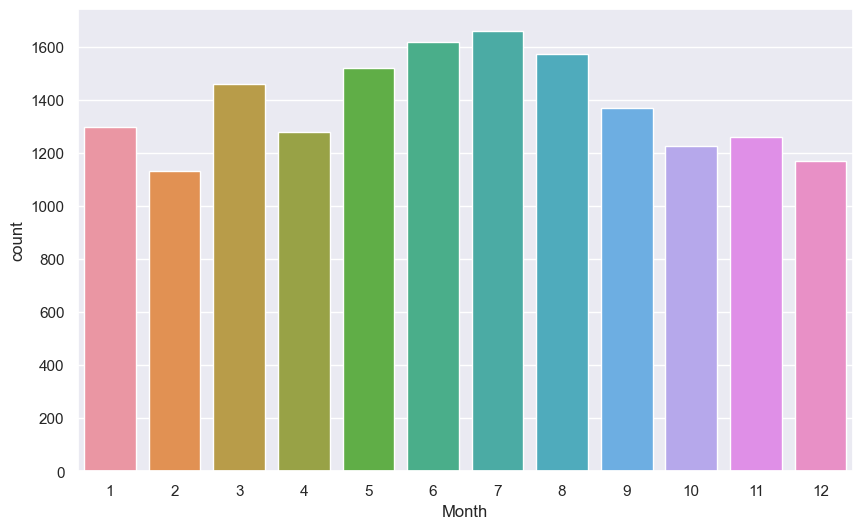

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['RainTomorrow']=='Yes'],x='Month');

There are monts where the chances of raining increases, specially during summer

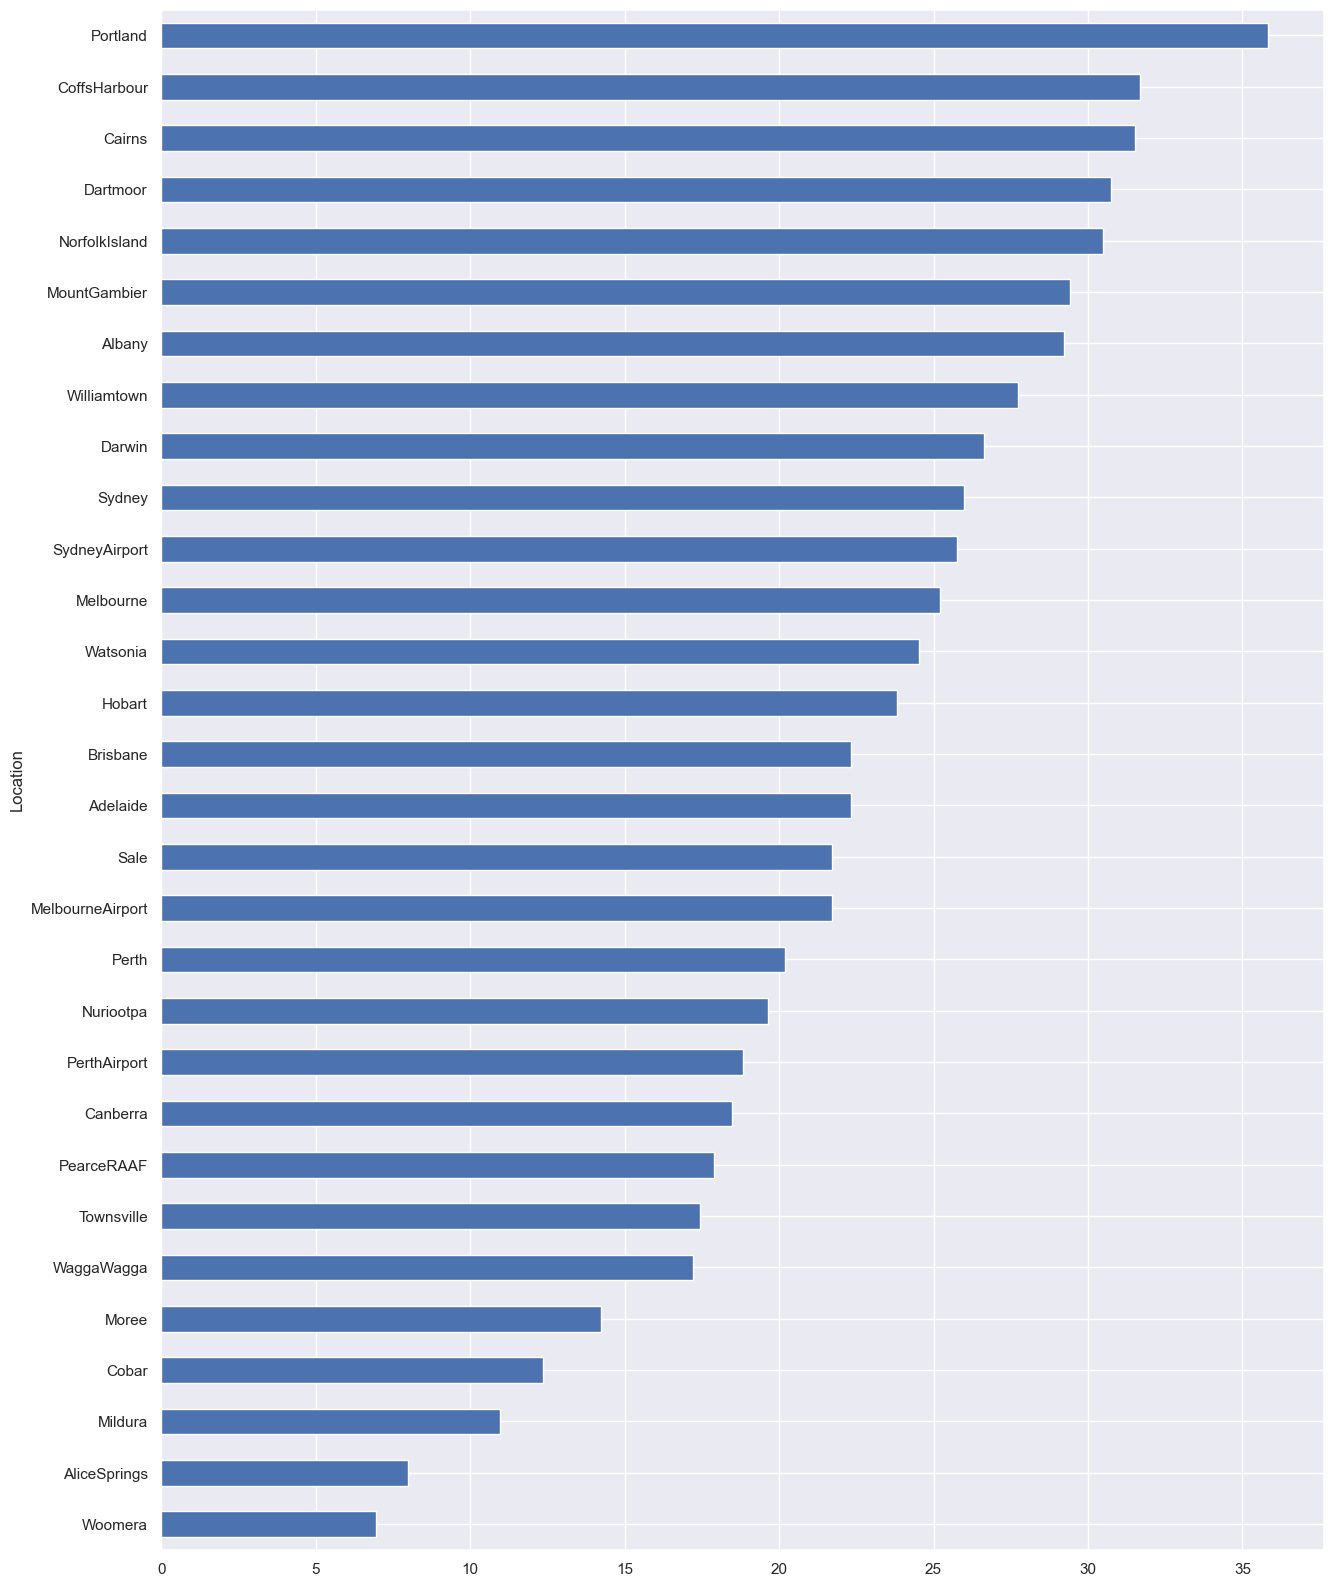

In [34]:
rainLoc_df=pd.crosstab(df['Location'],df['RainToday']) 
# getting percentage of raining days and non raining days for each city 
rainLoc_df=rainLoc_df/rainLoc_df.transpose().sum().values.reshape((-1, 1))*100
rainLoc_sorted = rainLoc_df.sort_values(by='Yes',ascending=True )
rainLoc_sorted.Yes.plot(kind="barh",figsize=(15,20));

There are also locations where is more likely to have a rainy day than others as happened with the months

In [35]:
location_label_maping={}
for n, location in enumerate(rainLoc_sorted.index):
    location_label_maping[location] = n
df['Location'] = df['Location'].map(location_label_maping)    

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73982 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           73982 non-null  datetime64[ns]
 1   Location       73982 non-null  int64         
 2   MinTemp        73905 non-null  float64       
 3   MaxTemp        73938 non-null  float64       
 4   Rainfall       73982 non-null  float64       
 5   Evaporation    70200 non-null  float64       
 6   Sunshine       73982 non-null  float64       
 7   WindGustDir    69637 non-null  object        
 8   WindGustSpeed  69660 non-null  float64       
 9   WindDir9am     71334 non-null  object        
 10  WindDir3pm     73315 non-null  object        
 11  WindSpeed9am   73826 non-null  float64       
 12  WindSpeed3pm   73601 non-null  float64       
 13  Humidity9am    73597 non-null  float64       
 14  Humidity3pm    73418 non-null  float64       
 15  Pressure9am    

In [37]:
dfindependents =  df.drop(['Date','RainTomorrow','Location','RainToday'],axis=1)
dfindependents.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Month'],
      dtype='object')

### Handling dummie variables

In [38]:
dfnumeric = dfindependents._get_numeric_data()
dfcategorical = dfindependents.drop(list(dfnumeric.columns), axis=1)
dfcategorical.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [39]:
dirs_replace = {'SSW':'SW', 
                'WSW':'SW',
                'NNE':'NE',
                'ENE':'NE', 
                'WNW':'NW',
                'NNW':'NW',   
                'ESE':'SE', 
                'SSE':'SE',
                'S':'S',
                'N':'N',
                'W':'W',
                'E':'E',
                'SE':'SE',
                'NE':'NE',
                'SW':'SW',
                'NE':'NE',}


for colcateg in dfcategorical.columns:
    print(dfcategorical[colcateg].unique())
    dfcategorical[colcateg] = dfcategorical[colcateg].map(dirs_replace)
    print(dfcategorical[colcateg].unique())
    print('\n\n\n')

['SSW' 'S' 'SE' 'NNE' 'WNW' 'N' 'ENE' 'NE' 'E' 'SW' 'W' 'WSW' 'NNW' 'ESE'
 'SSE' 'NW' nan]
['SW' 'S' 'SE' 'NE' 'NW' 'N' 'E' 'W' nan]




['ENE' 'SSE' nan 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW'
 'ESE' 'WSW' 'SW']
['NE' 'SE' nan 'NW' 'N' 'S' 'W' 'SW' 'E']




['SW' 'SSE' 'N' 'NNW' 'WSW' 'WNW' 'S' 'ENE' 'SE' 'NNE' 'NW' 'E' 'ESE' 'NE'
 'SSW' 'W' nan]
['SW' 'SE' 'N' 'NW' 'S' 'NE' nan 'E' 'W']






In [40]:
dfcategorical = pd.get_dummies(dfcategorical)
dfcategorical

,WindGustDir_E,WindGustDir_N,WindGustDir_NE,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SW,WindGustDir_W,WindDir9am_E,WindDir9am_N,...,WindDir9am_SW,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SW,WindDir3pm_W
6049,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6050,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6052,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6053,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
142299,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142300,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
142301,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:

dfindependents = pd.concat([dfnumeric, dfcategorical, df.iloc[:,-3:-1]], axis=1)
dfindependents.shape

(73982, 43)

In [42]:
dfindependents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73982 entries, 6049 to 142302
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MinTemp         73905 non-null  float64
 1   MaxTemp         73938 non-null  float64
 2   Rainfall        73982 non-null  float64
 3   Evaporation     70200 non-null  float64
 4   Sunshine        73982 non-null  float64
 5   WindGustSpeed   69660 non-null  float64
 6   WindSpeed9am    73826 non-null  float64
 7   WindSpeed3pm    73601 non-null  float64
 8   Humidity9am     73597 non-null  float64
 9   Humidity3pm     73418 non-null  float64
 10  Pressure9am     73855 non-null  float64
 11  Pressure3pm     73849 non-null  float64
 12  Cloud9am        66335 non-null  float64
 13  Cloud3pm        64745 non-null  float64
 14  Temp9am         73868 non-null  float64
 15  Temp3pm         73666 non-null  float64
 16  Month           73982 non-null  int64  
 17  WindGustDir_E   73982 non-n

### Handling Outliers 

In [43]:
def box_plot(dataf_outliers, df_no_outliers):
    plt.figure(figsize=(10,4))
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.boxplot(data=dataf_outliers.values, palette='pastel', ax = axes[0])
    axes[0].set_title(f'Box Plot: {dataf_outliers.name} - With Outliers')
    sns.boxplot(data=df_no_outliers.values, palette='pastel', ax = axes[1])
    axes[1].set_title(f'Box Plot: {df_no_outliers.name} - Without Outliers')  
    plt.show()


def drop_outliers(dataf, colname):
    dfcol = dataf[colname]
    dfcol = dfcol[~np.isnan(dfcol)]
    iqr = 1.5*(np.percentile(dfcol,75)-np.percentile(dfcol,25))
    
    dataf.drop(dataf[dataf[colname] > (iqr + np.percentile(dfcol,75))].index, inplace=True)
    dataf.drop(dataf[dataf[colname] < (np.percentile(dfcol,25)-iqr)].index, inplace=True)
    return dataf[colname]

MinTemp
outliers: (73905,), no outliers: (73967,)


<Figure size 1000x400 with 0 Axes>

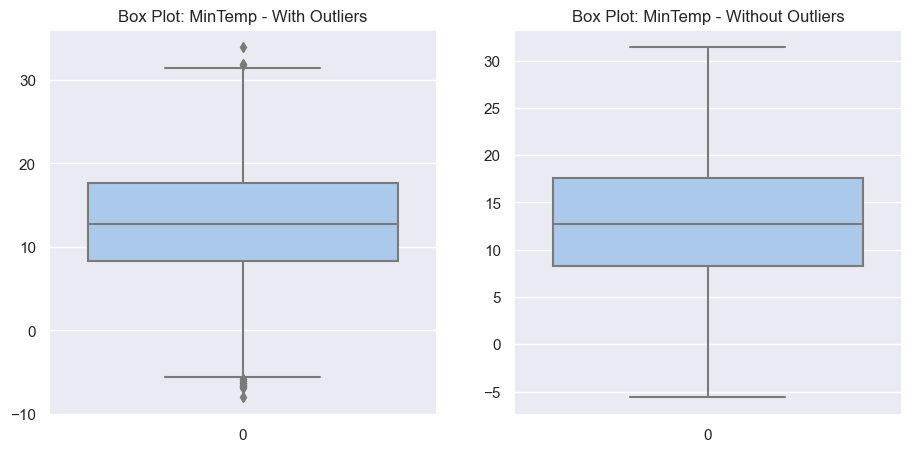

MaxTemp
outliers: (73923,), no outliers: (73945,)


<Figure size 1000x400 with 0 Axes>

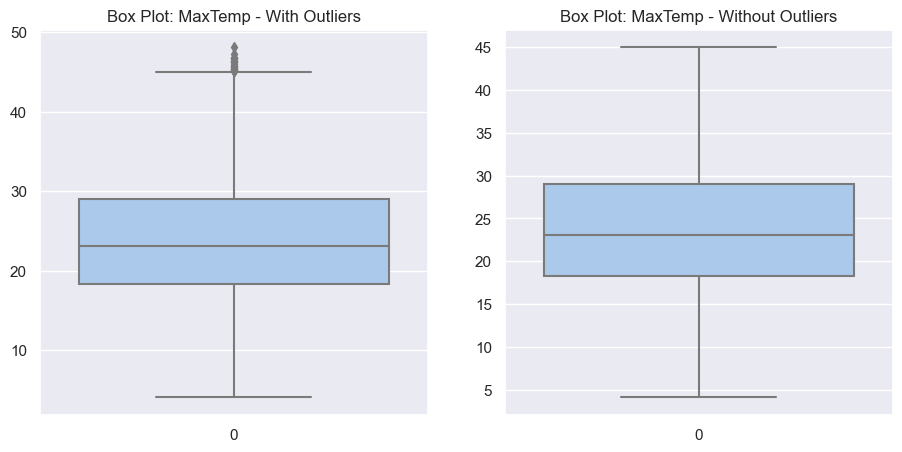

Rainfall
outliers: (73945,), no outliers: (60602,)


<Figure size 1000x400 with 0 Axes>

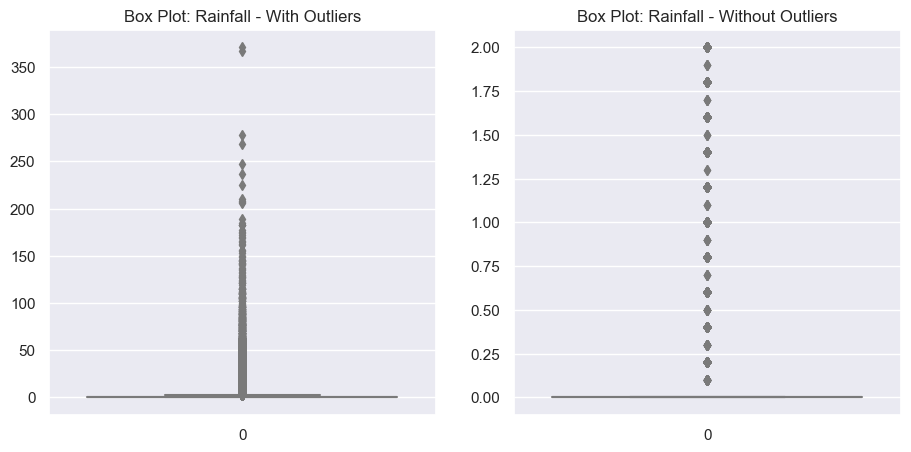

Evaporation
outliers: (57642,), no outliers: (59349,)


<Figure size 1000x400 with 0 Axes>

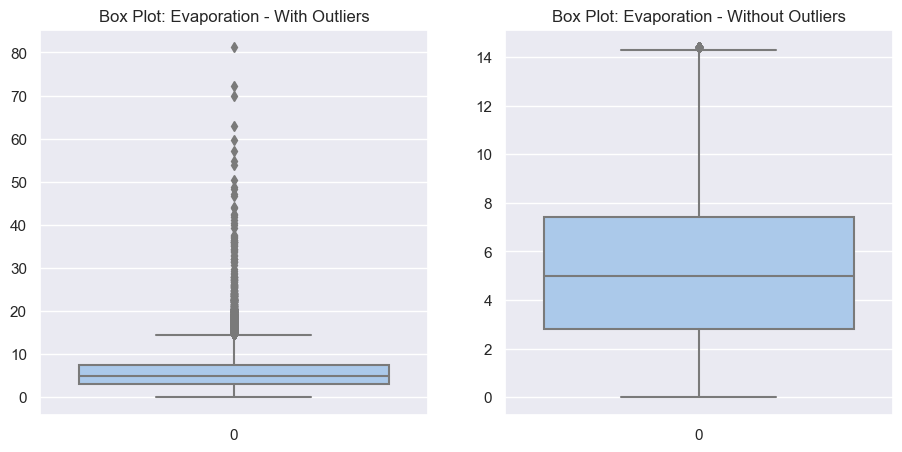

Sunshine
outliers: (59349,), no outliers: (59349,)


<Figure size 1000x400 with 0 Axes>

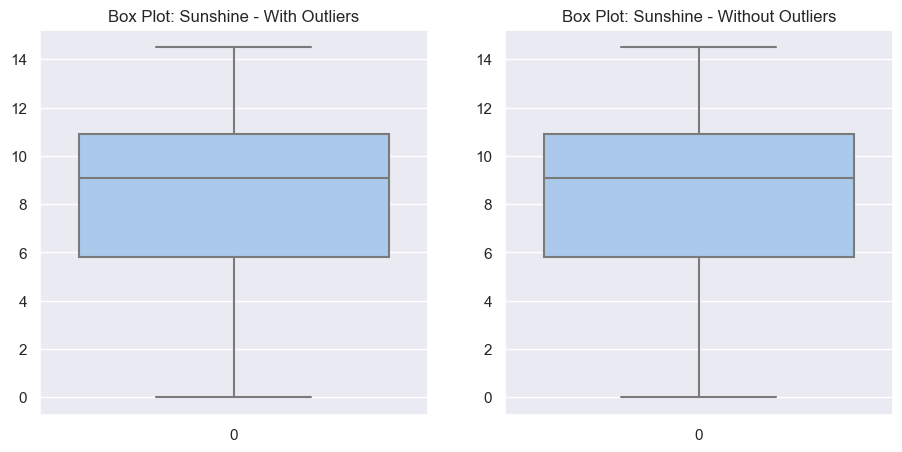

WindGustSpeed
outliers: (56008,), no outliers: (57448,)


<Figure size 1000x400 with 0 Axes>

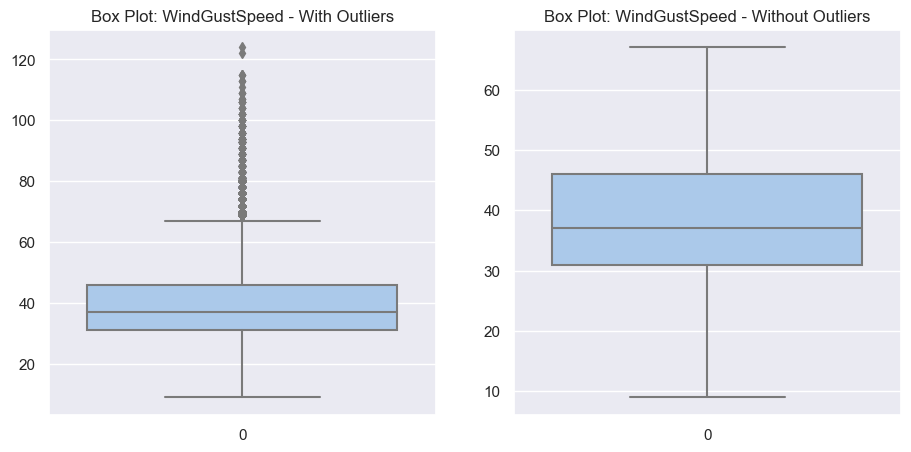

WindSpeed9am
outliers: (57334,), no outliers: (56737,)


<Figure size 1000x400 with 0 Axes>

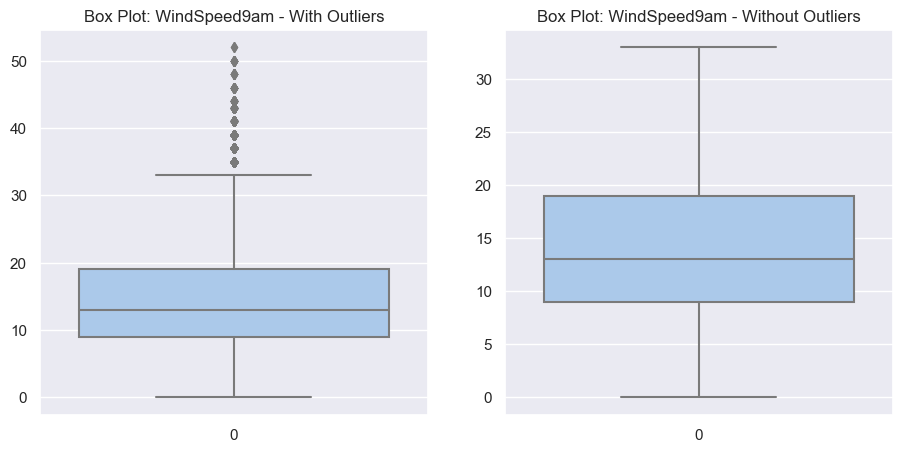

WindSpeed3pm
outliers: (56449,), no outliers: (56453,)


<Figure size 1000x400 with 0 Axes>

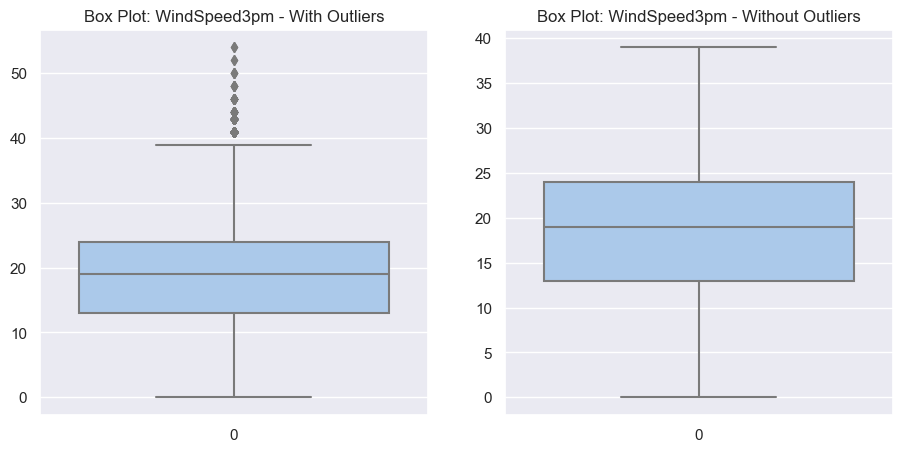

Humidity9am
outliers: (56175,), no outliers: (55651,)


<Figure size 1000x400 with 0 Axes>

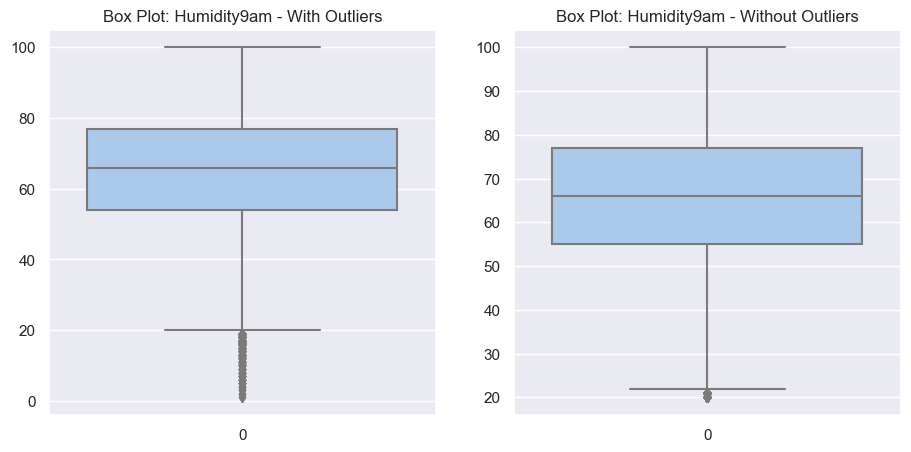

Humidity3pm
outliers: (55230,), no outliers: (55651,)


<Figure size 1000x400 with 0 Axes>

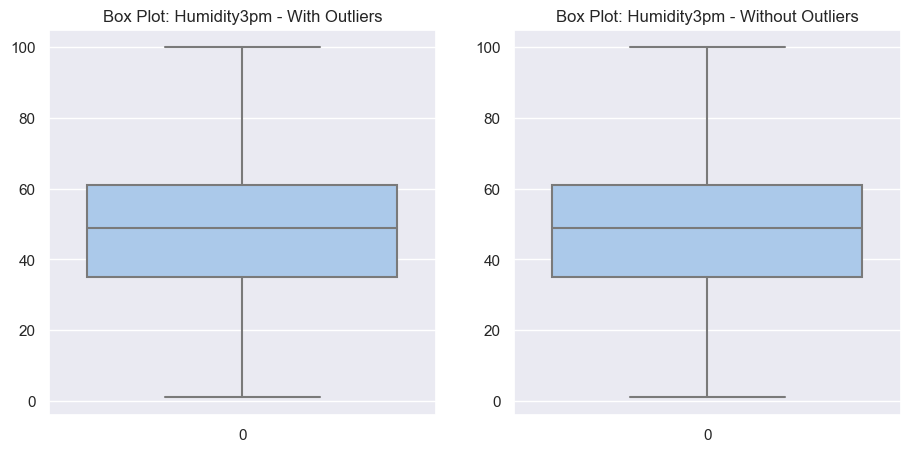

Pressure9am
outliers: (55564,), no outliers: (55257,)


<Figure size 1000x400 with 0 Axes>

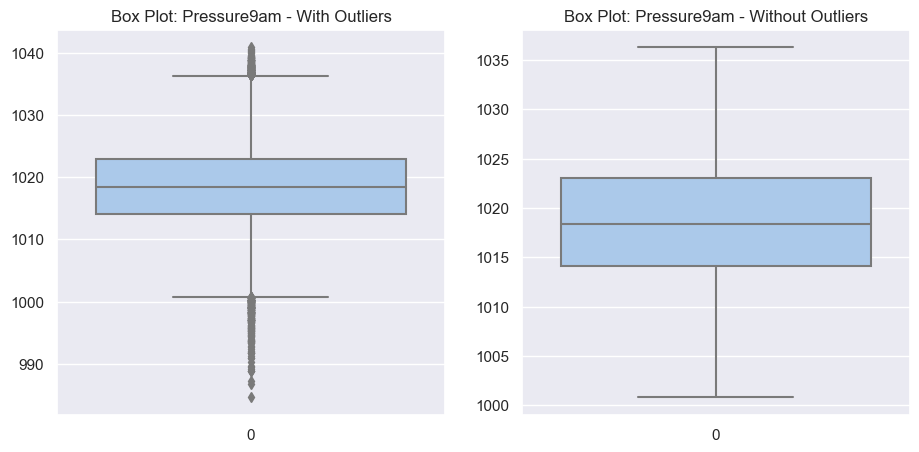

Pressure3pm
outliers: (55168,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

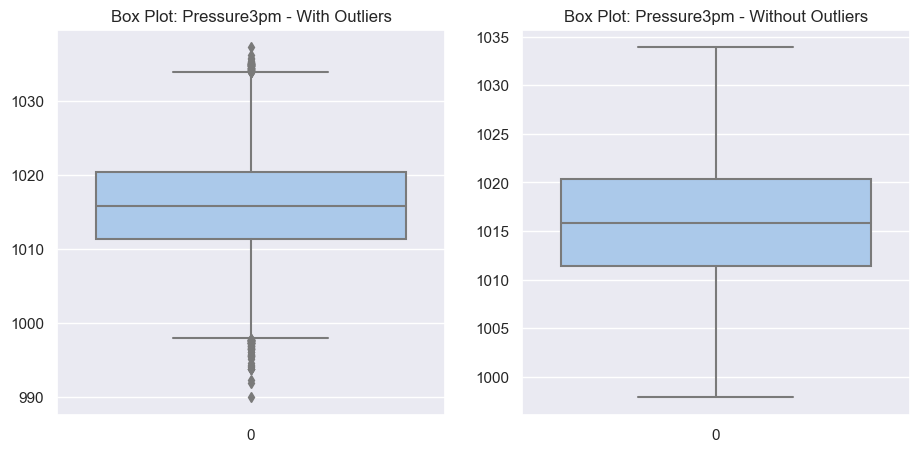

Cloud9am
outliers: (49393,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

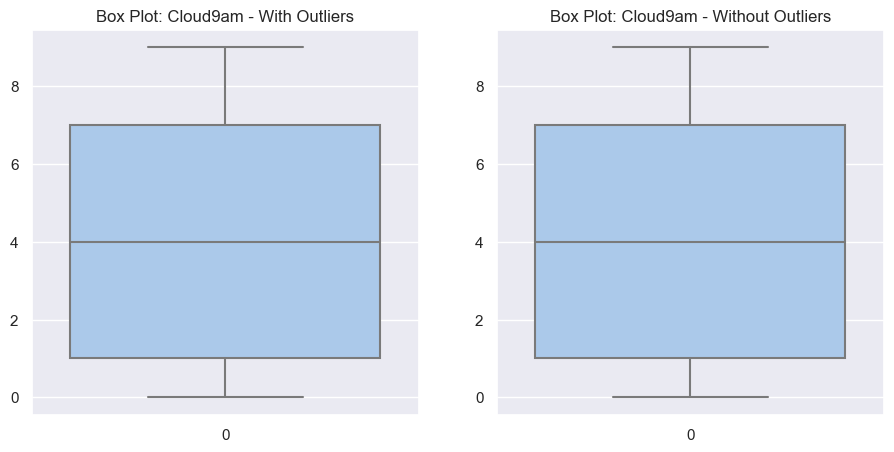

Cloud3pm
outliers: (48148,), no outliers: (55137,)


<Figure size 1000x400 with 0 Axes>

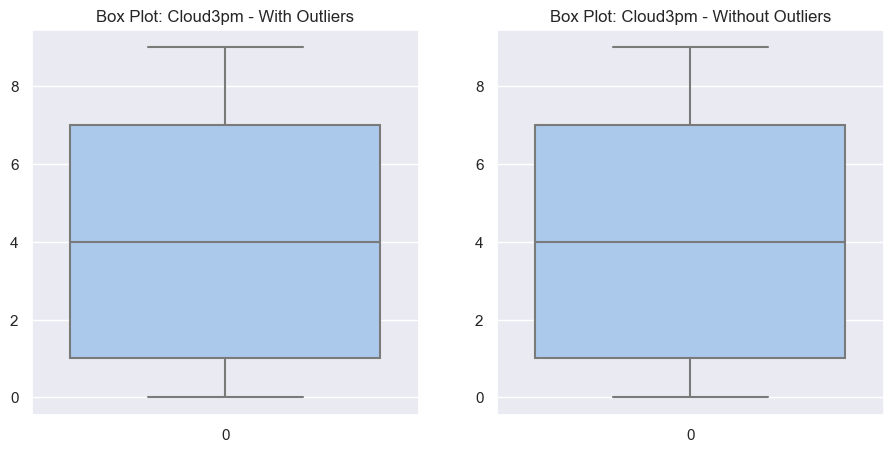

Temp9am
outliers: (55061,), no outliers: (55135,)


<Figure size 1000x400 with 0 Axes>

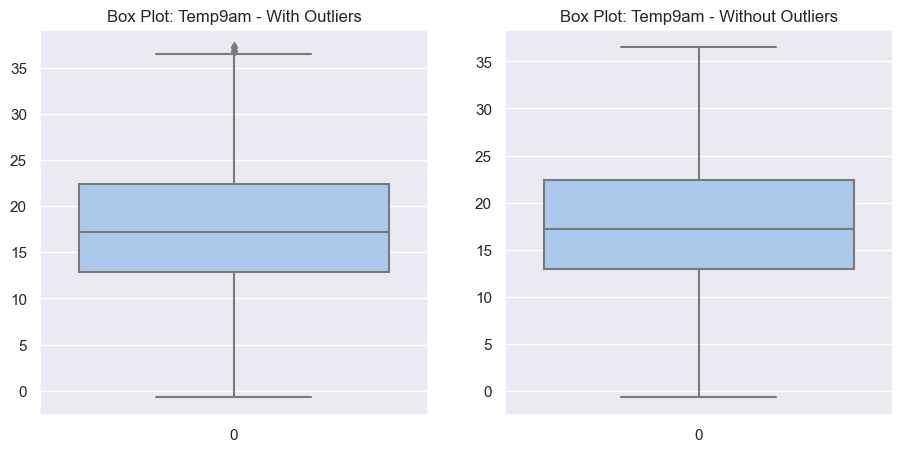

Temp3pm
outliers: (54892,), no outliers: (55104,)


<Figure size 1000x400 with 0 Axes>

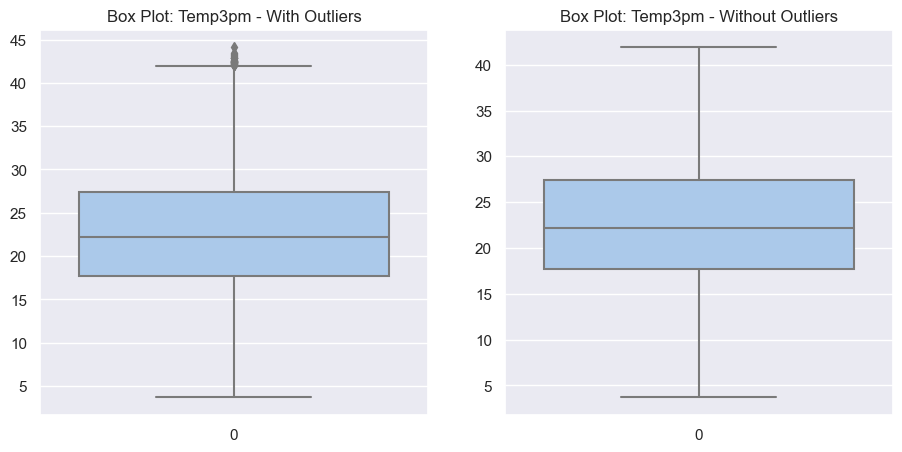

Month
outliers: (55104,), no outliers: (55104,)


<Figure size 1000x400 with 0 Axes>

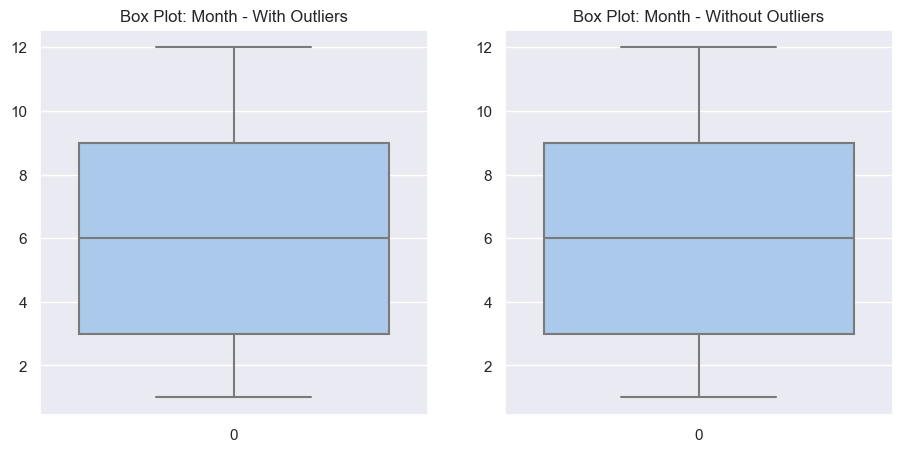

In [44]:
for col in dfnumeric.columns:
    print(col)
    dfcol = dfindependents[col]
    dfcol = dfcol[~np.isnan(dfcol)]
    df_no_outliers = drop_outliers(dfindependents, col)
    print(f'outliers: {dfcol.shape}, no outliers: {df_no_outliers.shape}')
    box_plot(dfcol, df_no_outliers)

### Handling Missing Values

In [45]:
def fill_mean(datacol):
    dataunique = datacol.unique()
    dataunique = dataunique[~np.isnan(dataunique)]
    data_mean = np.mean(dataunique)
    return datacol.fillna(data_mean)

In [46]:
for col in dfnumeric.columns:
    dfindependents[col] = fill_mean(dfindependents[col])

In [47]:
dfindependents.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustSpeed     0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
Month             0
WindGustDir_E     0
WindGustDir_N     0
WindGustDir_NE    0
WindGustDir_NW    0
WindGustDir_S     0
WindGustDir_SE    0
WindGustDir_SW    0
WindGustDir_W     0
WindDir9am_E      0
WindDir9am_N      0
WindDir9am_NE     0
WindDir9am_NW     0
WindDir9am_S      0
WindDir9am_SE     0
WindDir9am_SW     0
WindDir9am_W      0
WindDir3pm_E      0
WindDir3pm_N      0
WindDir3pm_NE     0
WindDir3pm_NW     0
WindDir3pm_S      0
WindDir3pm_SE     0
WindDir3pm_SW     0
WindDir3pm_W      0
RainToday         0
RainTomorrow      0
dtype: int64

In [48]:
encoder = LabelEncoder()
dfindependents.iloc[:,-2:] = dfindependents.iloc[:,-2:].apply(LabelEncoder().fit_transform)
dfindependents['Location'] = df['Location']

X = dfindependents.drop('RainTomorrow',axis=1)
y = dfindependents['RainTomorrow']
X.shape

(55104, 43)

In [50]:
mayority_weight = y.value_counts()[0]/y.shape[0]
minority_weight = y.value_counts()[1]/y.shape[0]
print(mayority_weight, minority_weight)

0.844566637630662 0.15543336236933797


In [51]:
dfindependents0 = dfindependents.groupby('RainTomorrow', group_keys=False).apply(lambda x: x.sample(frac=0.07))
X = dfindependents0.drop('RainTomorrow',axis=1)
y = dfindependents0['RainTomorrow']
X.shape

(3858, 43)

In [52]:
mayority_weight = y.value_counts()[0]/y.shape[0]
minority_weight = y.value_counts()[1]/y.shape[0]
print(mayority_weight, minority_weight)

0.8444790046656299 0.15552099533437014


### Unbalance problems

Text(0.5, 1.0, '7% Subsample of the Dataset ')

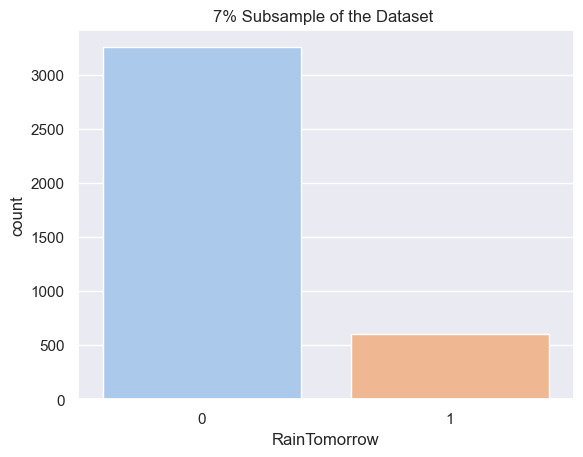

In [55]:
ax = sns.countplot(x=y, palette='pastel')
plt.title('7% Subsample of the Dataset ')

## Functions

In [247]:
def store_metrics(metr, ytest, ypr):
    metr[0].append(roc_auc_score(ytest, ypr))
    metr[1].append(f1_score(ytest, ypr))
    metr[2].append(precision_score(ytest, ypr))
    metr[3].append(recall_score(ytest, ypr))
    return metr

In [248]:
def calculate_KNN(Xtrain_resampled,Xtrain,ytrain_resampled,ytrain,Xtest,ytest, neighbors = 30):
    aucscores_resampled = []
    aucscores = []
    
    for k in range(1,neighbors):
        knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
        knn.fit(Xtrain_resampled, ytrain_resampled)
        ypred_resampled = knn.predict(Xtest) 
        ## computing f1 score
        score = roc_auc_score(ytest, ypred_resampled)
        aucscores_resampled.append(score)
        
        knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
        knn.fit(Xtrain, ytrain)
        ypred = knn.predict(Xtest) 
        ## computing f1 score
        score = roc_auc_score(ytest, ypred)
        aucscores.append(score)


    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.set(font_scale = 1)
    sns.lineplot(y=aucscores_resampled, x=range(1,neighbors), ax = axes[0])
    axes[0].set_title('Balanced Dataset')
    axes[0].set(xlabel='Neighbors', ylabel='ROC-AUC Score')
    sns.lineplot(y=aucscores, x=range(1,neighbors), ax = axes[1])
    axes[1].set_title('Unbalanced Dataset')
    axes[1].set(xlabel='Neighbors', ylabel='ROC-AUC Score')




# KNN

### SMOTE Oversampling

In [499]:

smote = SMOTE()
normal = MinMaxScaler()
#normalization
Xnorm = scale(X)
Xnorm = pd.DataFrame(Xnorm, columns=X.columns)

#split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.3, random_state=13)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SW,WindDir3pm_W,RainToday
736,0.645137,-0.236602,-0.857621,-0.41366,-0.767459,-2.099943,-0.783068,-0.097719,-1.548390,-0.103964,...,3.891306,-0.285093,-0.245912,-0.465046,-0.350919,-0.267706,-0.505825,2.056123,-0.264916,-0.261538
3753,1.005175,-0.141006,0.071718,-0.41366,-0.497045,-0.133404,-0.005001,-0.907766,0.052823,0.016214,...,-0.256983,-0.285093,-0.245912,-0.465046,2.849661,-0.267706,-0.505825,-0.486352,-0.264916,-0.261538
3581,-1.755113,-1.479361,-1.025207,-0.41366,-0.632252,-0.976206,2.243767,0.712328,2.454642,-0.164053,...,-0.256983,-0.285093,4.066493,-0.465046,-0.350919,-0.267706,-0.505825,-0.486352,-0.264916,-0.261538
2957,0.525125,-0.364065,-0.476744,-0.41366,-1.173080,-0.582898,-0.978348,0.442313,-1.681824,-0.584676,...,-0.256983,-0.285093,-0.245912,-0.465046,-0.350919,-0.267706,-0.505825,-0.486352,3.774786,-0.261538
2233,1.005175,-0.555258,-0.781446,-0.41366,-1.105476,-0.891926,-0.005001,-1.312789,-0.214046,1.338172,...,-0.256983,-0.285093,-0.245912,-0.465046,-0.350919,-0.267706,-0.505825,2.056123,-0.264916,-0.261538


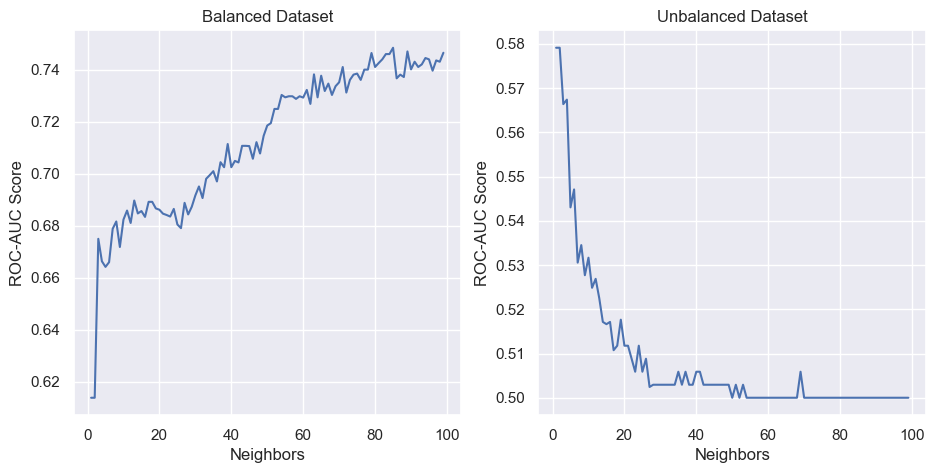

In [250]:

calculate_KNN(Xtrain_resampled,Xtrain,ytrain_resampled,ytrain,Xtest,ytest, neighbors = 100)

In [500]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(Xnorm)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    knn_unbalanced = KNeighborsClassifier(n_neighbors = 2, weights='distance')
    knn_unbalanced.fit(train_X, train_y)
    ypred = knn_unbalanced.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = smote.fit_resample(train_X, train_y)
    knn_balanced = KNeighborsClassifier(n_neighbors = 83, weights='distance')
    knn_balanced.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = knn_balanced.predict(test_X)
    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])

In [501]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0

,ROC_AUC,F1,Precision,Recall
Balanced,0.731,0.429,0.287,0.855
Unbalanced,0.590,0.307,0.334,0.287


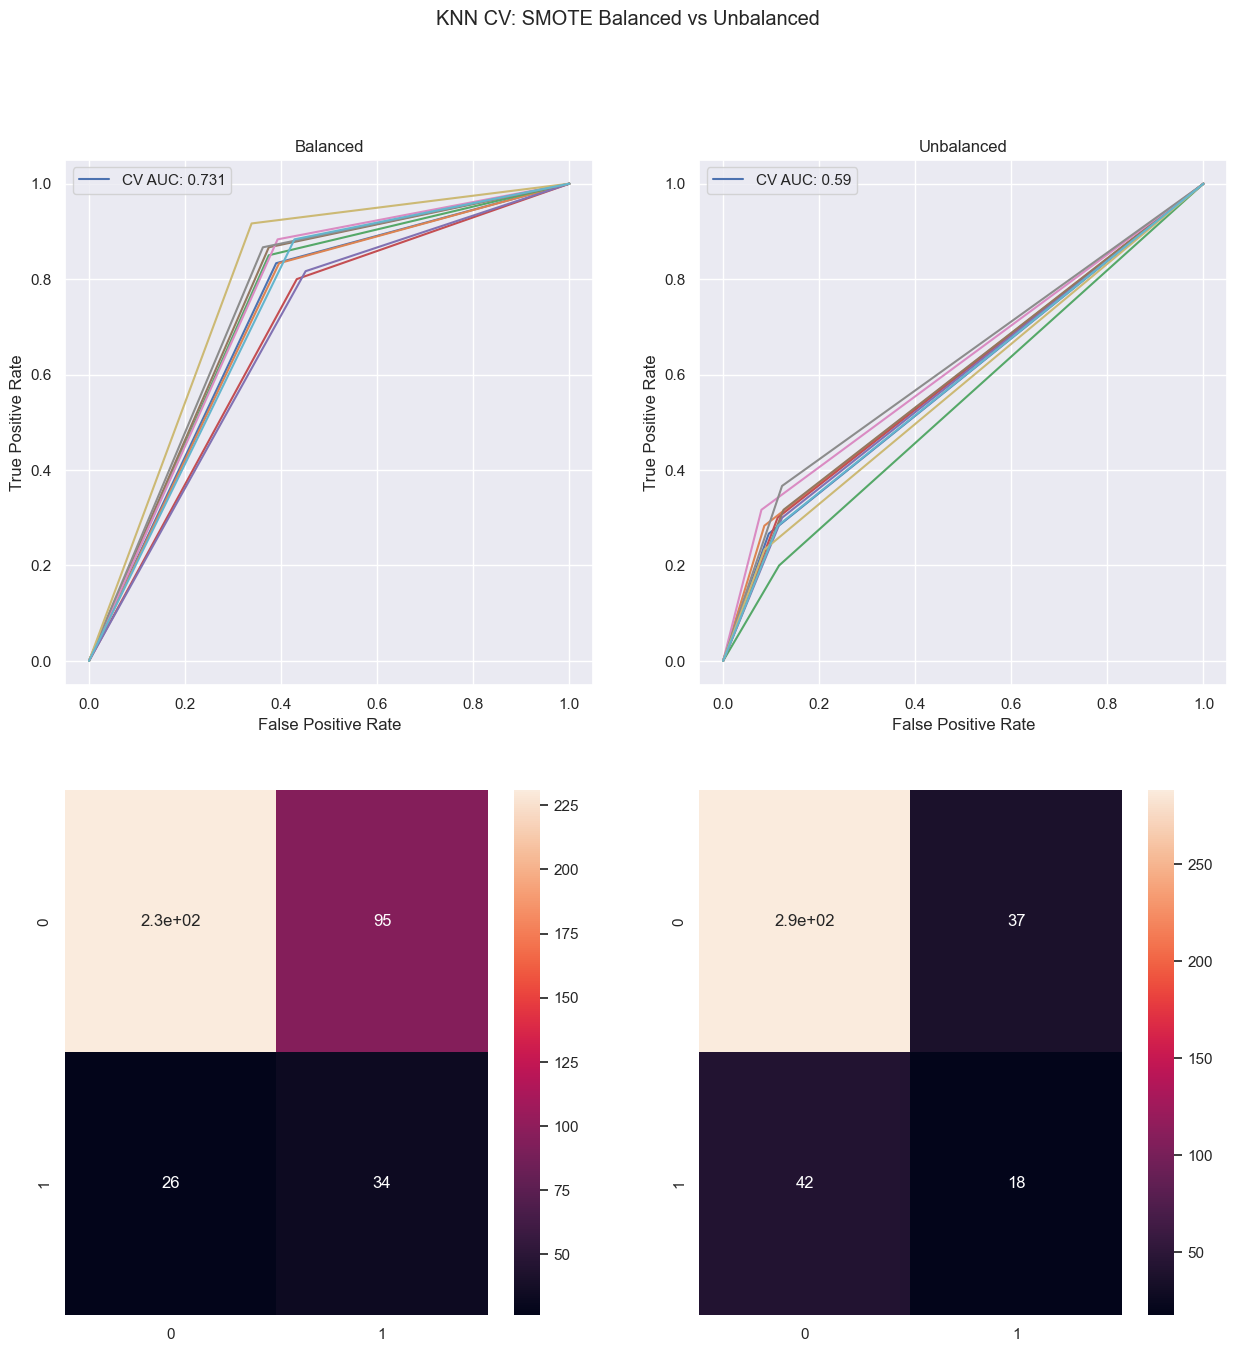

In [502]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'KNN CV: SMOTE Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()

    

### NearMiss Undersampling

In [515]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
Xtrain_resampled, ytrain_resampled = nm.fit_resample(Xtrain, ytrain)

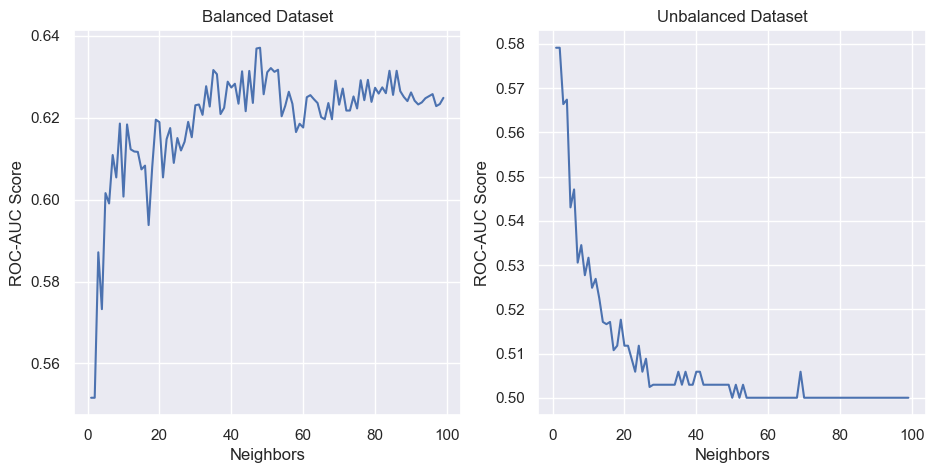

In [255]:
calculate_KNN(Xtrain_resampled,Xtrain,ytrain_resampled,ytrain,Xtest,ytest, neighbors = 100)

In [516]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(Xnorm)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    knn_unbalanced = KNeighborsClassifier(n_neighbors = 3, weights='distance')
    knn_unbalanced.fit(train_X, train_y)
    ypred = knn_unbalanced.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = nm.fit_resample(train_X, train_y)
    knn_balanced = KNeighborsClassifier(n_neighbors = 45, weights='distance')
    knn_balanced.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = knn_balanced.predict(test_X)
    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])

In [517]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0

,ROC_AUC,F1,Precision,Recall
Balanced,0.635,0.369,0.307,0.463
Unbalanced,0.579,0.282,0.433,0.212


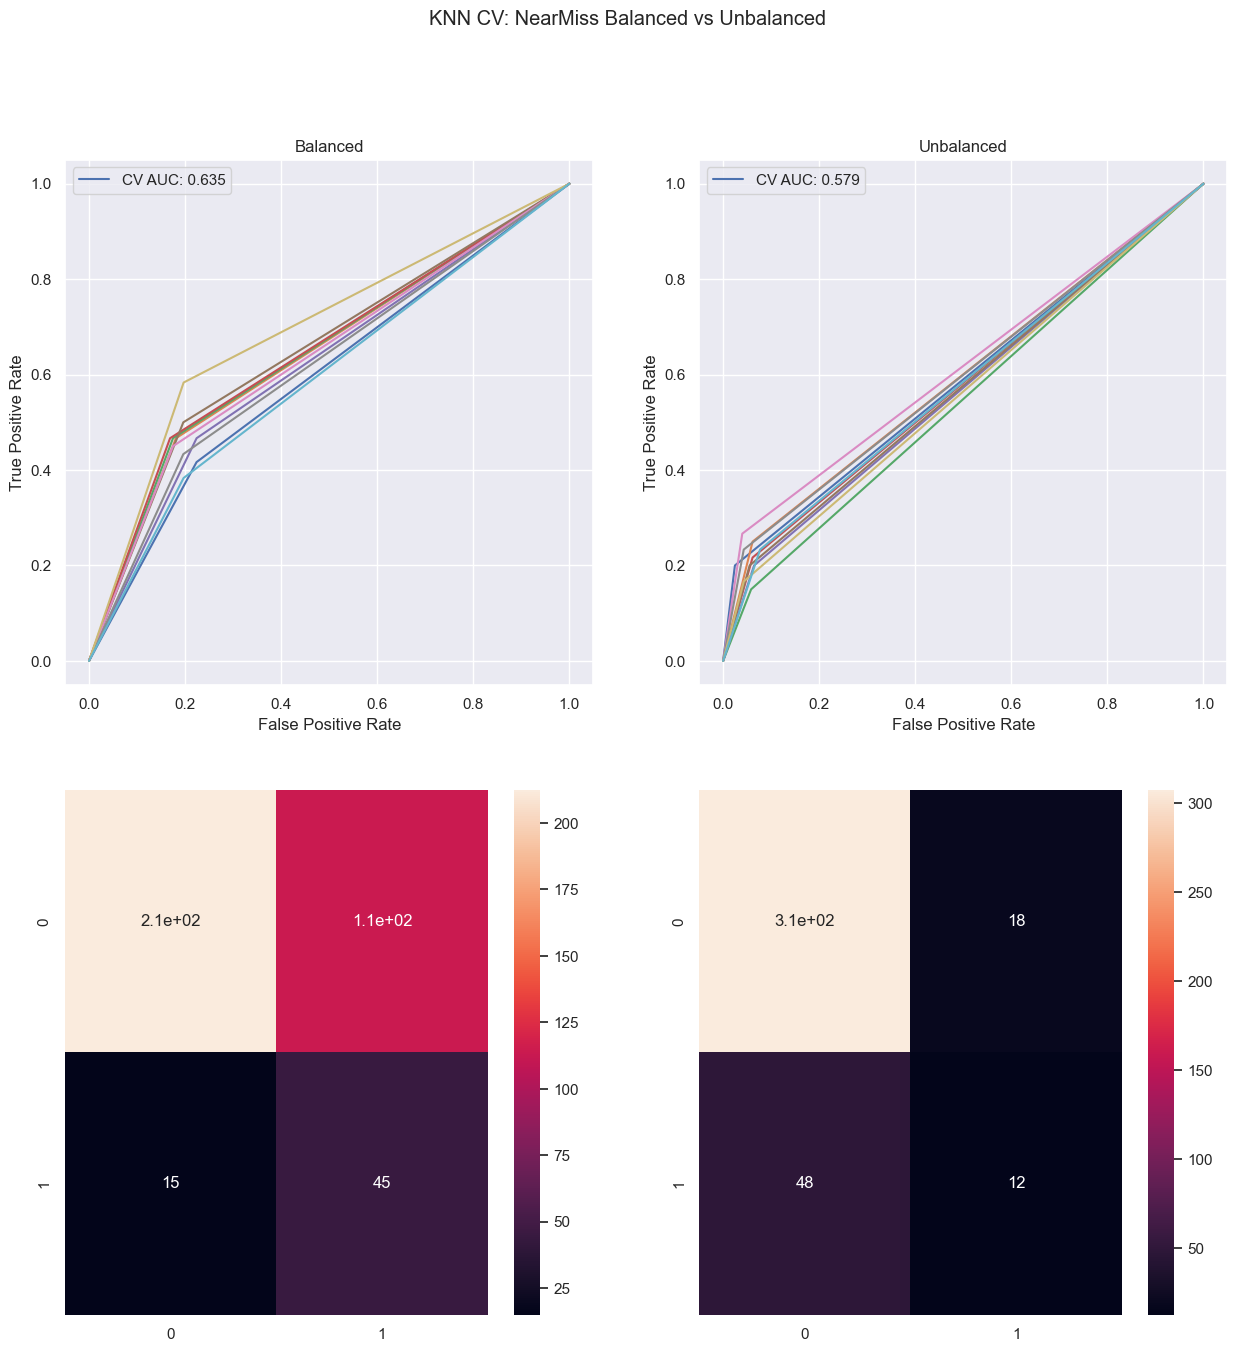

In [518]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'KNN CV: NearMiss Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()

    

# SVM

### SMOTE Oversampling

In [507]:
smote = SMOTE()
normal = MinMaxScaler()
#normalization
Xnorm = scale(X)
Xnorm = pd.DataFrame(Xnorm, columns=X.columns)


In [508]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(Xnorm)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    svm_unbalanced = SVC(kernel='rbf', class_weight = 'balanced', gamma=0.001, random_state=0)
    svm_unbalanced.fit(train_X, train_y)
    ypred = svm_unbalanced.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = smote.fit_resample(train_X, train_y)
    svm_balanced = SVC(kernel='rbf', C = 0.03, gamma='auto', random_state=0)
    svm_balanced.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = svm_balanced.predict(test_X)
    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])
    
    
    



In [509]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0


,ROC_AUC,F1,Precision,Recall
Balanced,0.738,0.476,0.357,0.717
Unbalanced,0.753,0.491,0.366,0.747


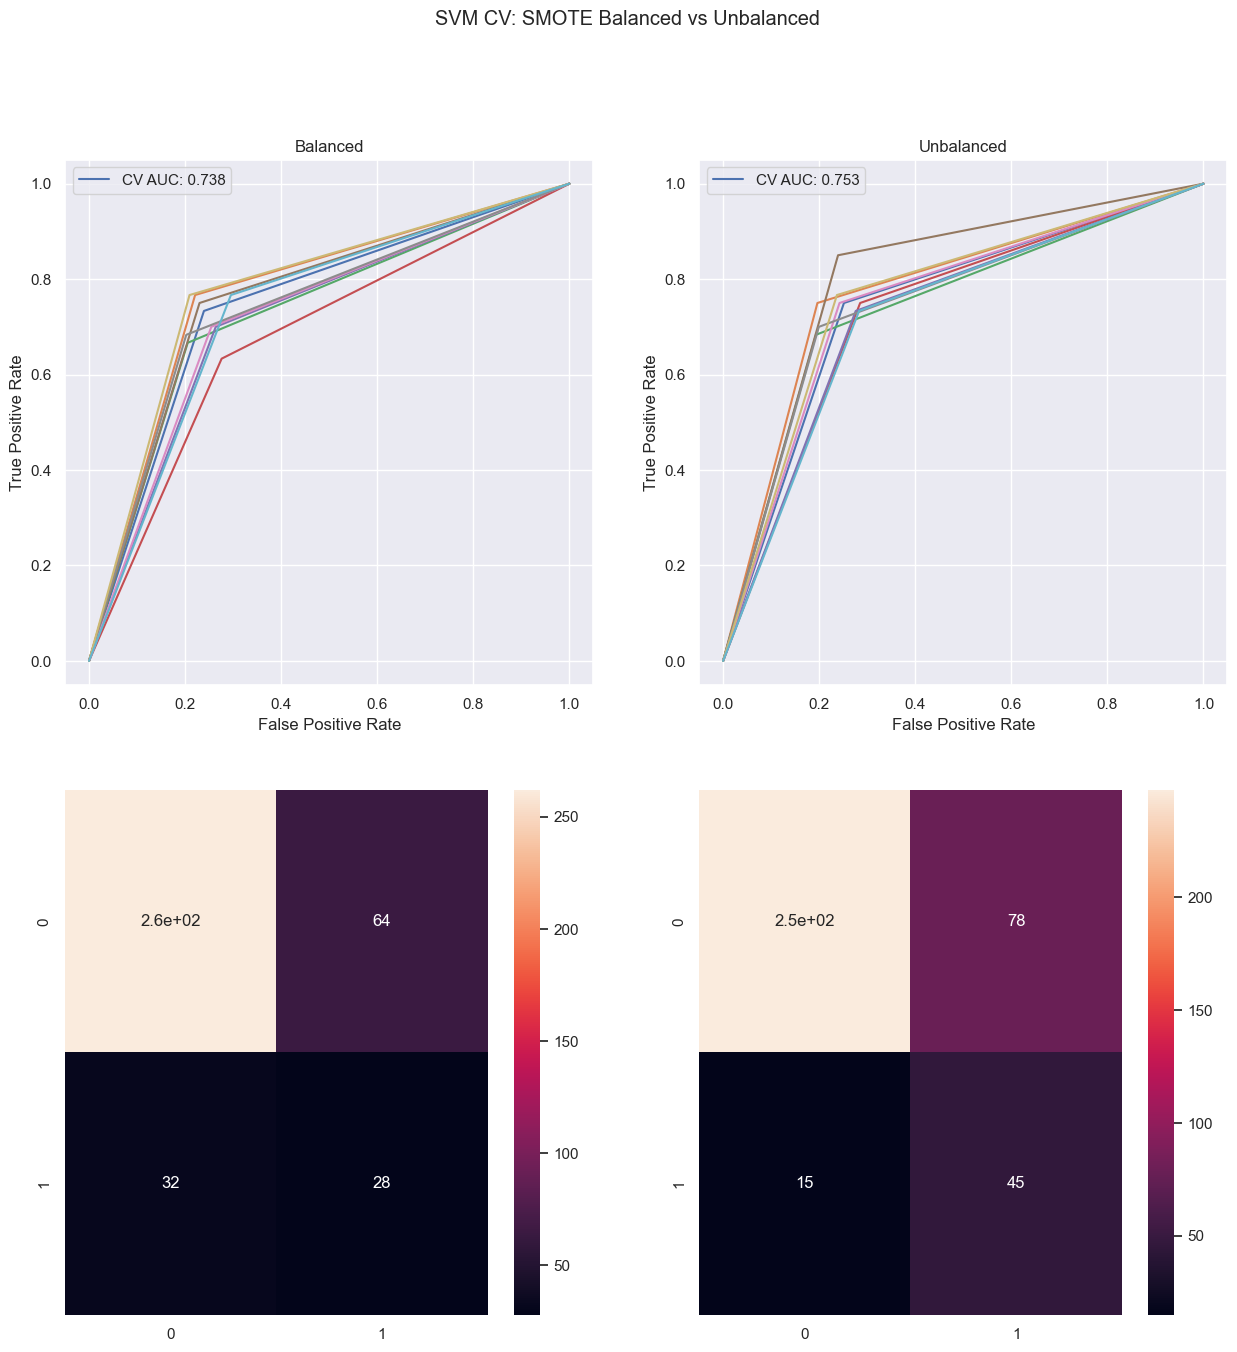

In [510]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'SVM CV: SMOTE Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()
    
    

### NearMiss Undersampling

In [511]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()


In [512]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(Xnorm)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    svm_unbalanced = SVC(kernel='rbf', class_weight = 'balanced', gamma=0.001)
    svm_unbalanced.fit(train_X, train_y)
    ypred = svm_unbalanced.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = nm.fit_resample(train_X, train_y)
    svm_balanced = SVC(kernel='rbf', class_weight = 'balanced' , gamma=0.001)
    svm_balanced.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = svm_balanced.predict(test_X)
    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])
    
    
    



In [513]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0


,ROC_AUC,F1,Precision,Recall
Balanced,0.702,0.414,0.287,0.748
Unbalanced,0.753,0.491,0.366,0.747


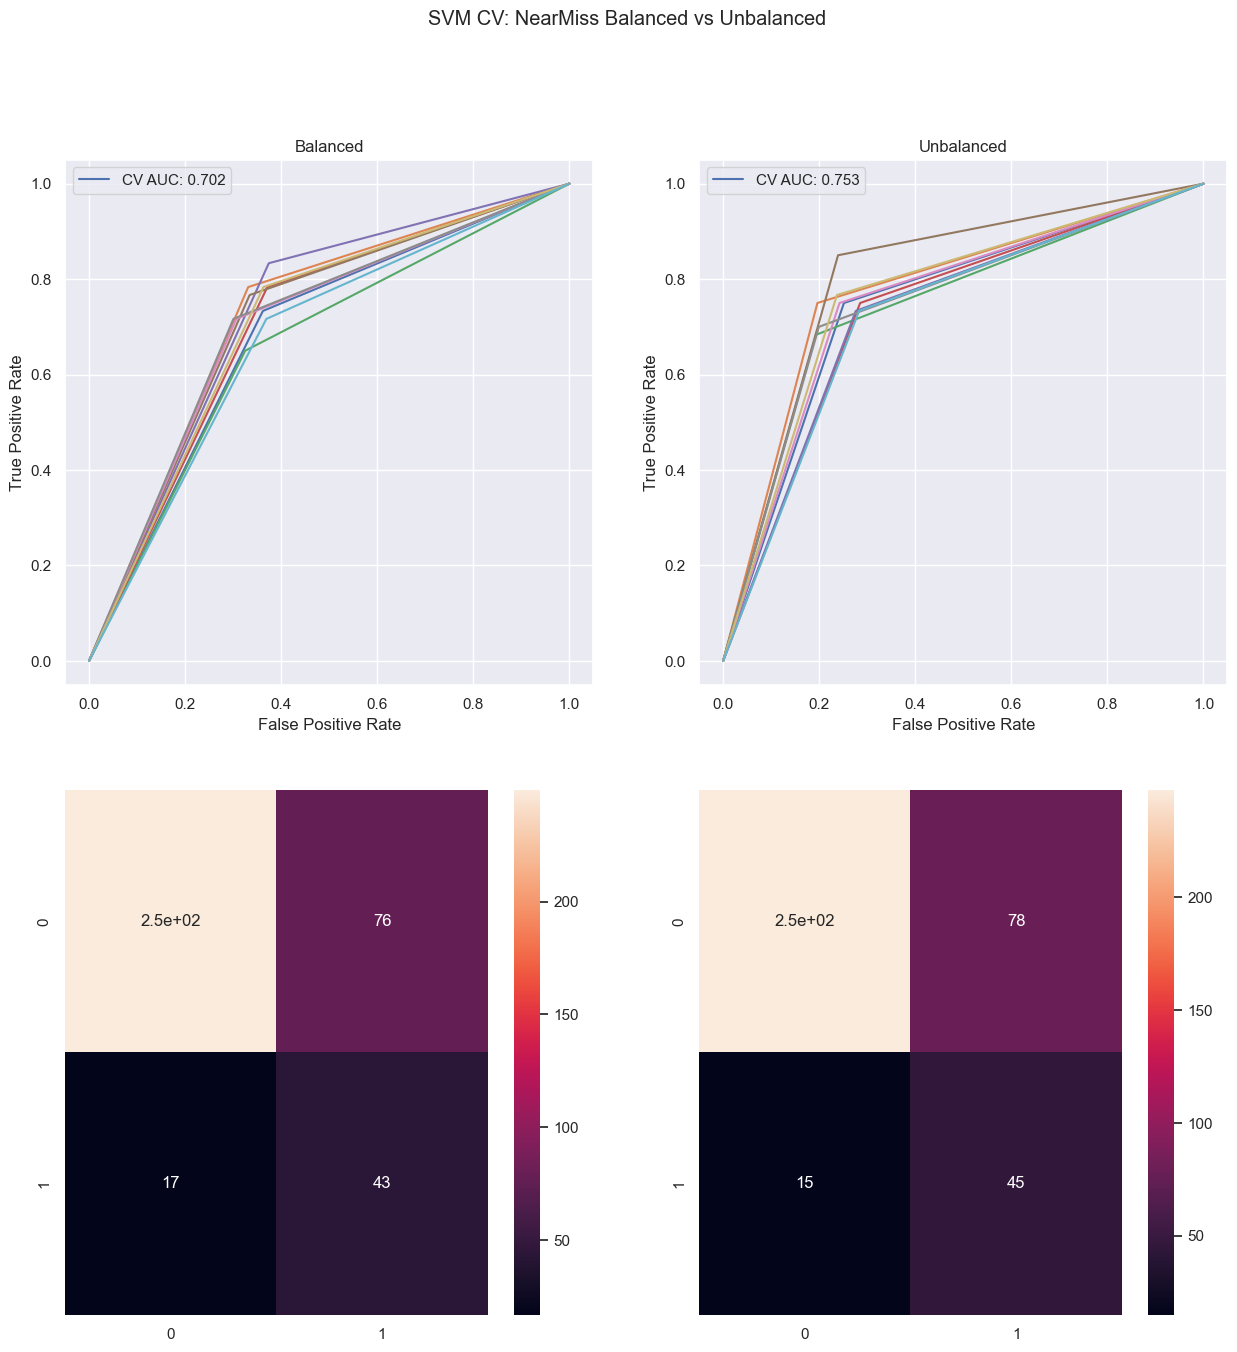

In [514]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'SVM CV: NearMiss Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()

    

# Classification Trees

### SMOTE Oversampling

In [457]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SW,WindDir3pm_W,RainToday
66064,12,14.9,18.8,0.0,7.4,0.3,61.0,31.0,30.0,58.0,...,0,0,1,0,0,0,0,0,0,0
136224,1,5.2,23.1,0.0,7.6,11.0,50.0,15.0,22.0,31.0,...,0,0,0,0,0,0,1,0,0,0
102023,24,18.0,38.4,0.0,9.4,5.8,59.0,24.0,33.0,22.0,...,0,0,0,0,0,0,0,0,0,0
66237,12,7.3,23.4,0.0,6.2,10.9,35.0,9.0,7.0,58.0,...,0,0,0,0,0,0,0,1,0,0
130074,16,9.9,18.9,0.0,3.8,12.0,37.0,6.0,22.0,57.0,...,0,0,0,0,0,0,1,0,0,0


In [458]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=13)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)

In [459]:
classi_tree = DecisionTreeClassifier(random_state=2, criterion='gini', class_weight='balanced')
classi_tree = classi_tree.fit(Xtrain_resampled, ytrain_resampled)
classi_tree.fit(Xtrain_resampled, ytrain_resampled)

ypred_resampled = classi_tree.predict(Xtest)
scores = classification_report(ytest, ypred_resampled)
roc_auc = roc_auc_score(ytest, ypred_resampled)
print('\t\t\t====Balanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Balanced===
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       988
           1       0.31      0.42      0.36       170

    accuracy                           0.78      1158
   macro avg       0.60      0.63      0.61      1158
weighted avg       0.81      0.78      0.79      1158

roc_auc score: 0.6288640152417243


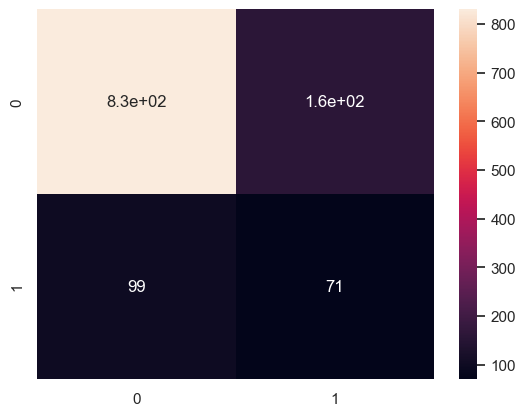

In [460]:
cf = confusion_matrix(ytest,  ypred_resampled)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

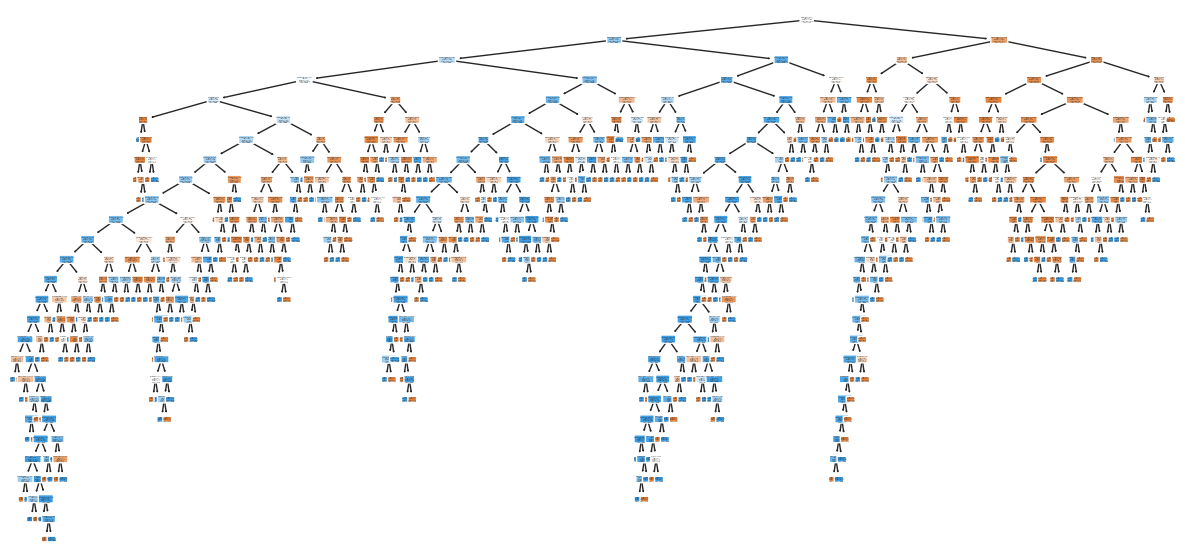

In [461]:
plt.figure(figsize=(15, 7))
plot_tree(classi_tree,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

###  Tuning CV

In [462]:
path = classi_tree.cost_complexity_pruning_path(Xtrain_resampled, ytrain_resampled)
alphas = path.ccp_alphas
ccp_alphas = alphas[:-1] #exclude the maximum value of alpha bc it leads to the the root of the tree

alpha_values = []
for a in alphas:
    classi_tree = DecisionTreeClassifier(random_state=0, ccp_alpha = a, criterion='gini', class_weight='balanced')
    scores_crossval = cross_val_score(classi_tree, Xtrain_resampled, ytrain_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
    alpha_values.append([a, np.mean(scores_crossval), np.std(scores_crossval)])
    

    
alpha_results = pd.DataFrame(alpha_values, columns=['alpha', 'roc_auc', 'std'])
best_alpha = alpha_results.sort_values(by='roc_auc', ascending=False).iloc[0,0]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.0013253455568060686


In [463]:
classi_tree_pruned = DecisionTreeClassifier(random_state = 2, ccp_alpha=best_alpha, criterion='gini', class_weight='balanced')
classi_tree_pruned.fit(Xtrain_resampled, ytrain_resampled)

#===========balanced
ypred = classi_tree_pruned.predict(Xtest)
scores = classification_report(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)
print('\t\t\t====Balanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Balanced===
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       988
           1       0.36      0.55      0.43       170

    accuracy                           0.79      1158
   macro avg       0.64      0.69      0.65      1158
weighted avg       0.83      0.79      0.81      1158

roc_auc score: 0.689521314598714


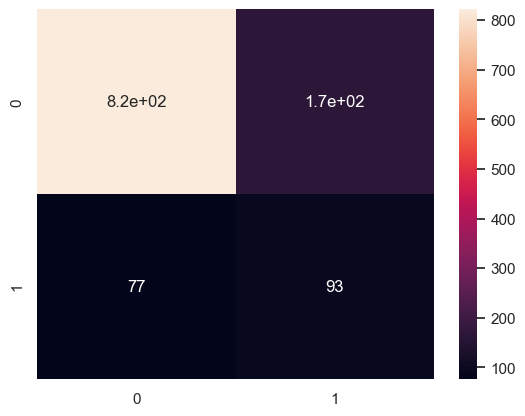

In [464]:
cf = confusion_matrix(ytest,  ypred)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

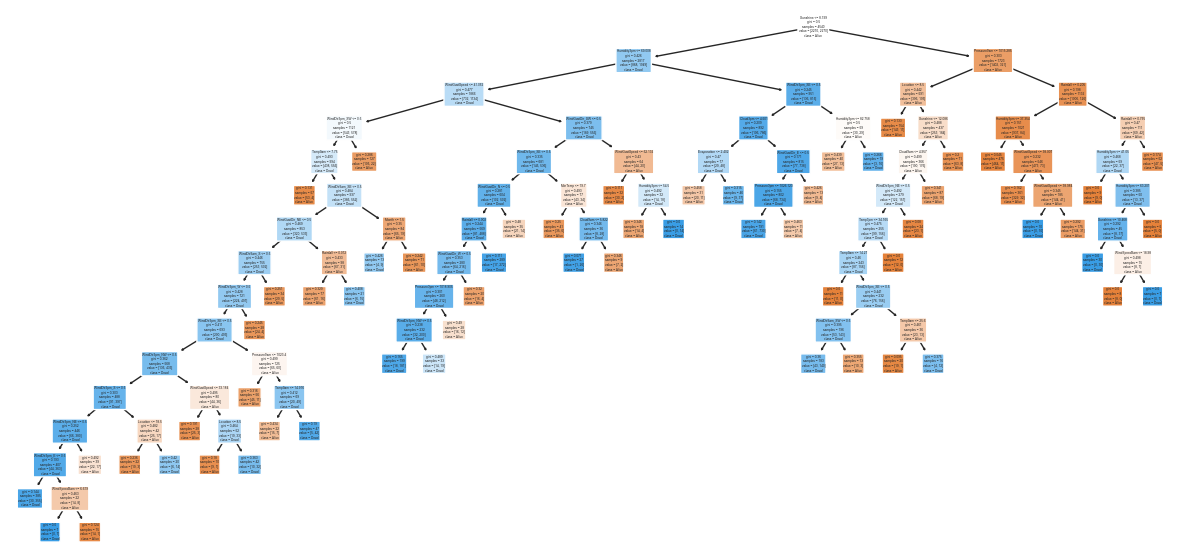

In [465]:
plt.figure(figsize=(15, 7))
plot_tree(classi_tree_pruned,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

### NearMiss Undersampling

In [466]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=13)
Xtrain_resampled, ytrain_resampled = nm.fit_resample(Xtrain, ytrain)

In [467]:
classi_tree = DecisionTreeClassifier(random_state=2, criterion='gini', class_weight='balanced')
classi_tree = classi_tree.fit(Xtrain_resampled, ytrain_resampled)
classi_tree.fit(Xtrain_resampled, ytrain_resampled)

ypred_resampled = classi_tree.predict(Xtest)
scores = classification_report(ytest, ypred_resampled)
roc_auc = roc_auc_score(ytest, ypred_resampled)
print('\t\t\t====Balanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Balanced===
              precision    recall  f1-score   support

           0       0.90      0.49      0.64       988
           1       0.19      0.69      0.30       170

    accuracy                           0.52      1158
   macro avg       0.55      0.59      0.47      1158
weighted avg       0.80      0.52      0.59      1158

roc_auc score: 0.5895629911883782


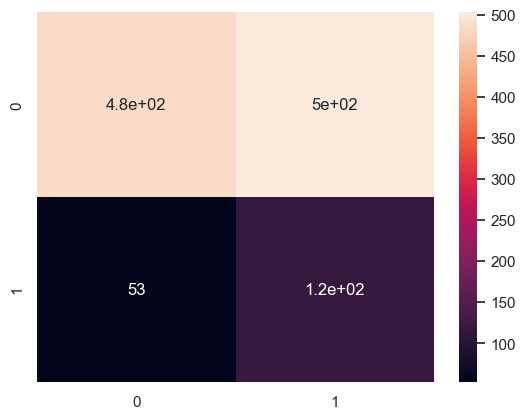

In [468]:
cf = confusion_matrix(ytest,  ypred_resampled)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

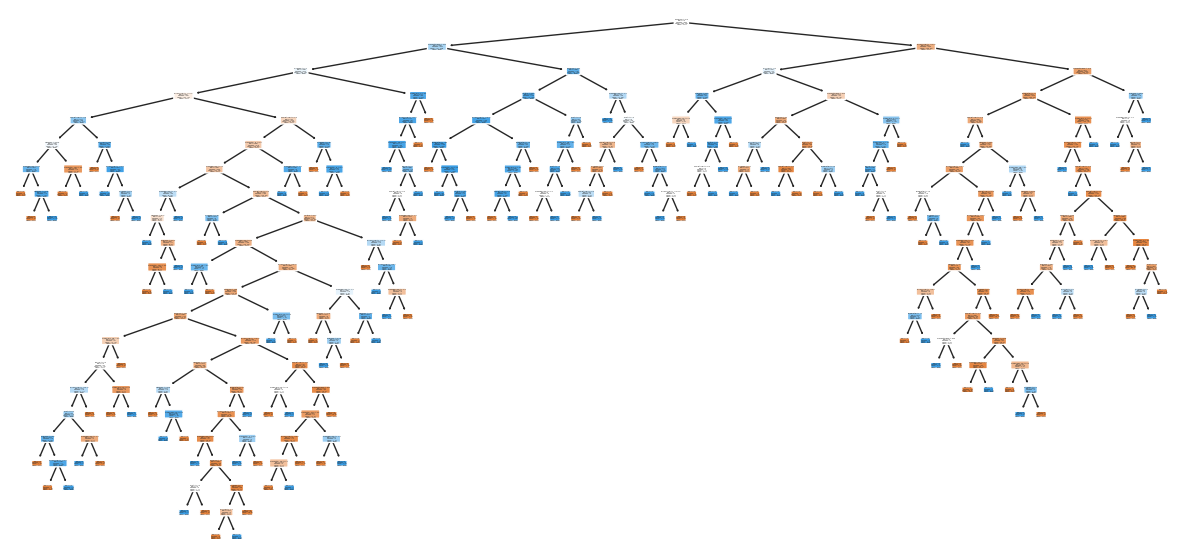

In [469]:
plt.figure(figsize=(15, 7))
plot_tree(classi_tree,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

### Tuning CV

In [470]:
path = classi_tree.cost_complexity_pruning_path(Xtrain_resampled, ytrain_resampled)
alphas = path.ccp_alphas
ccp_alphas = alphas[:-1] #exclude the maximum value of alpha bc it leads to the the root of the tree

alpha_values = []
for a in alphas:
    classi_tree = DecisionTreeClassifier(random_state=0, ccp_alpha = a, criterion='gini', class_weight='balanced')
    scores_crossval = cross_val_score(classi_tree, Xtrain_resampled, ytrain_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
    alpha_values.append([a, np.mean(scores_crossval), np.std(scores_crossval)])
    

    
alpha_results = pd.DataFrame(alpha_values, columns=['alpha', 'roc_auc', 'std'])
best_alpha = alpha_results.sort_values(by='roc_auc', ascending=False).iloc[0,0]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.005089846653429042


In [471]:
classi_tree_pruned = DecisionTreeClassifier(random_state = 2, ccp_alpha=best_alpha, criterion='gini', class_weight='balanced')
classi_tree_pruned.fit(Xtrain_resampled, ytrain_resampled)

#===========balanced
ypred = classi_tree_pruned.predict(Xtest)
scores = classification_report(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)
print('\t\t\t====Balanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Balanced===
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       988
           1       0.29      0.68      0.41       170

    accuracy                           0.71      1158
   macro avg       0.61      0.70      0.61      1158
weighted avg       0.84      0.71      0.75      1158

roc_auc score: 0.6994760657299357


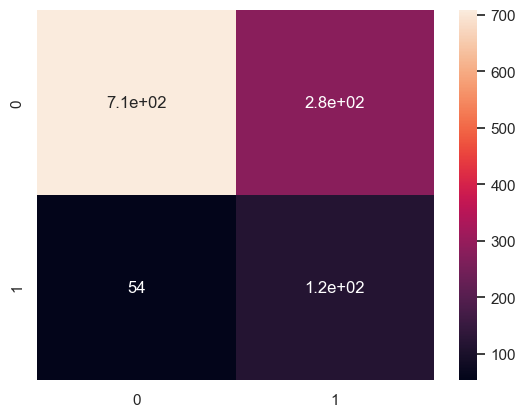

In [472]:
cf = confusion_matrix(ytest,  ypred)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

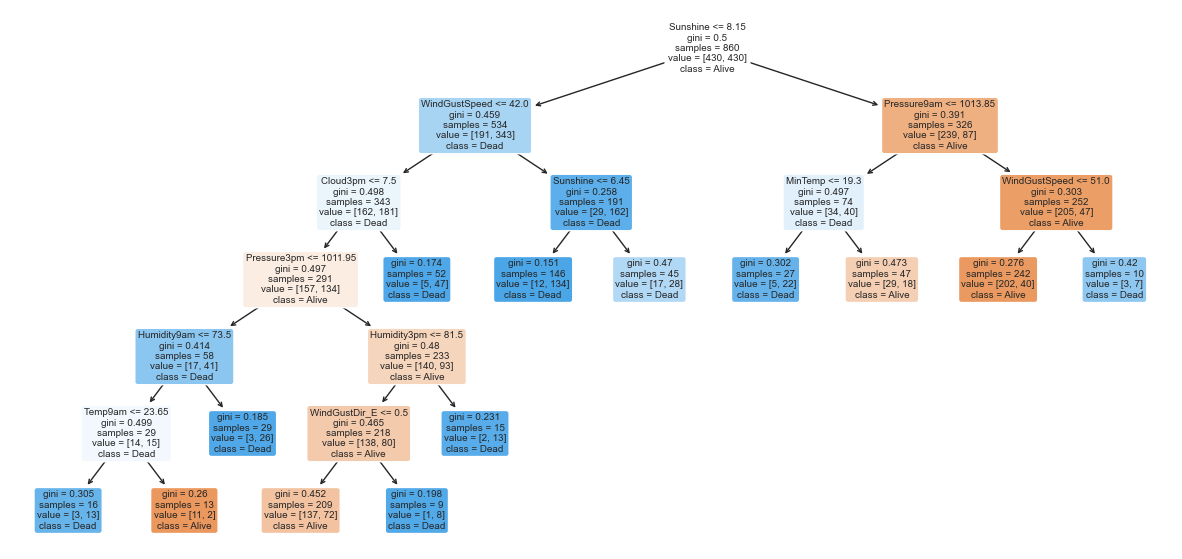

In [473]:
plt.figure(figsize=(15, 7))
plot_tree(classi_tree_pruned,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

### Unbalanced

In [474]:
#===========unbalanced
classi_tree_unbalanced = DecisionTreeClassifier(random_state=2, criterion='entropy',class_weight='balanced' )
classi_tree_unbalanced = classi_tree_unbalanced.fit(Xtrain, ytrain)
classi_tree_unbalanced.fit(Xtrain, ytrain)

ypred = classi_tree_unbalanced.predict(Xtest)
scores = classification_report(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)
print('\t\t\t====Balanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Balanced===
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       988
           1       0.36      0.36      0.36       170

    accuracy                           0.81      1158
   macro avg       0.62      0.62      0.62      1158
weighted avg       0.81      0.81      0.81      1158

roc_auc score: 0.6242498213860443


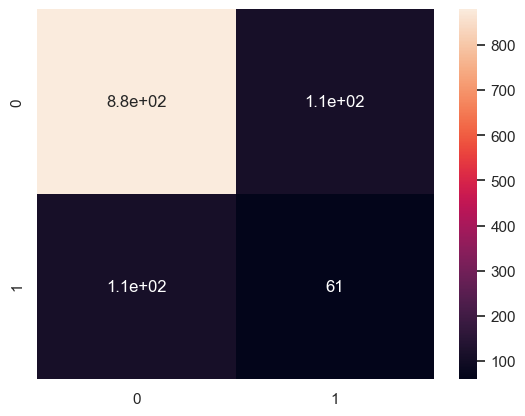

In [475]:
cf = confusion_matrix(ytest,  ypred)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

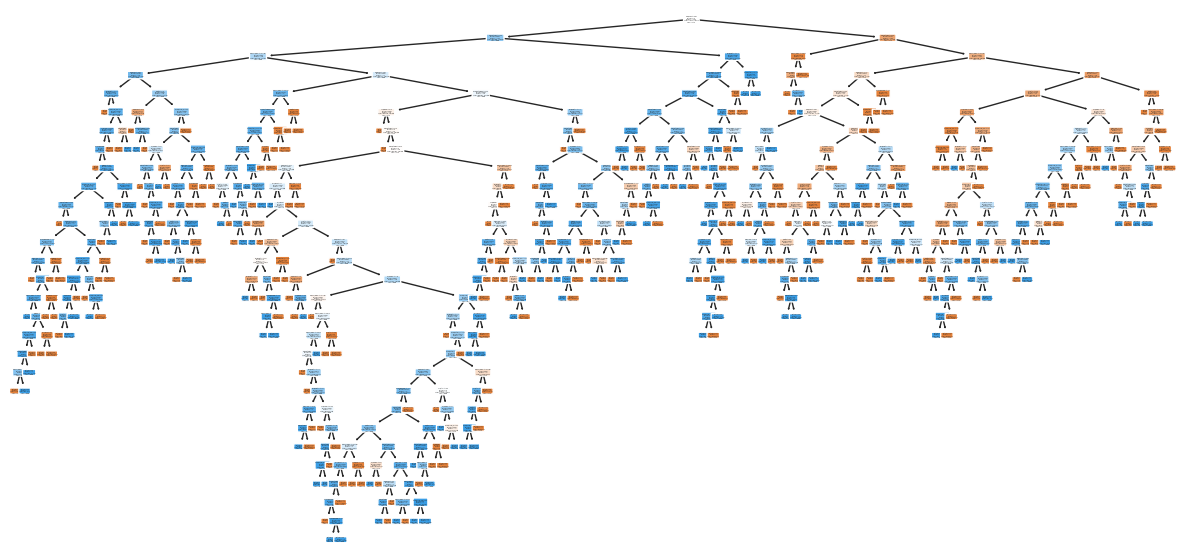

In [476]:

plt.figure(figsize=(15, 7))
plot_tree(classi_tree_unbalanced,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

### Unalanced Tuning CV

In [477]:
path = classi_tree_unbalanced.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path.ccp_alphas
ccp_alphas = alphas[:-1] #exclude the maximum value of alpha bc it leads to the the root of the tree

alpha_values = []
for a in alphas:
    classi_tree = DecisionTreeClassifier(random_state=0, ccp_alpha = a, criterion='entropy', class_weight='balanced')
    scores_crossval = cross_val_score(classi_tree, Xtrain, ytrain, cv=5, scoring='roc_auc', n_jobs=-1)
    alpha_values.append([a, np.mean(scores_crossval), np.std(scores_crossval)])
    

    
alpha_results = pd.DataFrame(alpha_values, columns=['alpha', 'roc_auc', 'std'])
best_alpha = alpha_results.sort_values(by='roc_auc', ascending=False).iloc[0,0]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.00710193711994056


In [478]:
classi_tree_unbalanced_pruned = DecisionTreeClassifier(random_state = 2, ccp_alpha=best_alpha, criterion='entropy', class_weight='balanced')
classi_tree_unbalanced_pruned.fit(Xtrain, ytrain)

#===========balanced
ypred = classi_tree_unbalanced_pruned.predict(Xtest)
scores = classification_report(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)
print('\t\t\t====Unbalanced===')
print(scores)
print(f'roc_auc score: {roc_auc}')

			====Unbalanced===
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       988
           1       0.38      0.61      0.46       170

    accuracy                           0.79      1158
   macro avg       0.65      0.72      0.67      1158
weighted avg       0.84      0.79      0.81      1158

roc_auc score: 0.7164027149321267


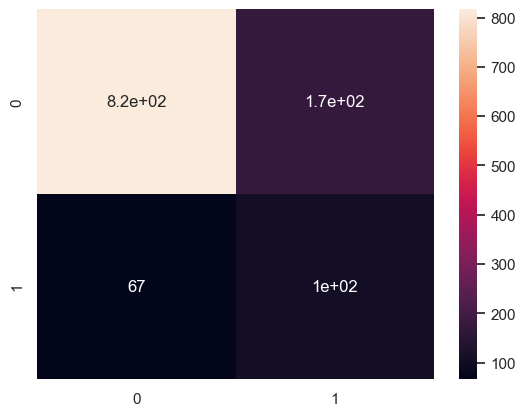

In [479]:
cf = confusion_matrix(ytest,  ypred)
sns.heatmap(pd.DataFrame(cf) , annot=True)
plt.show()

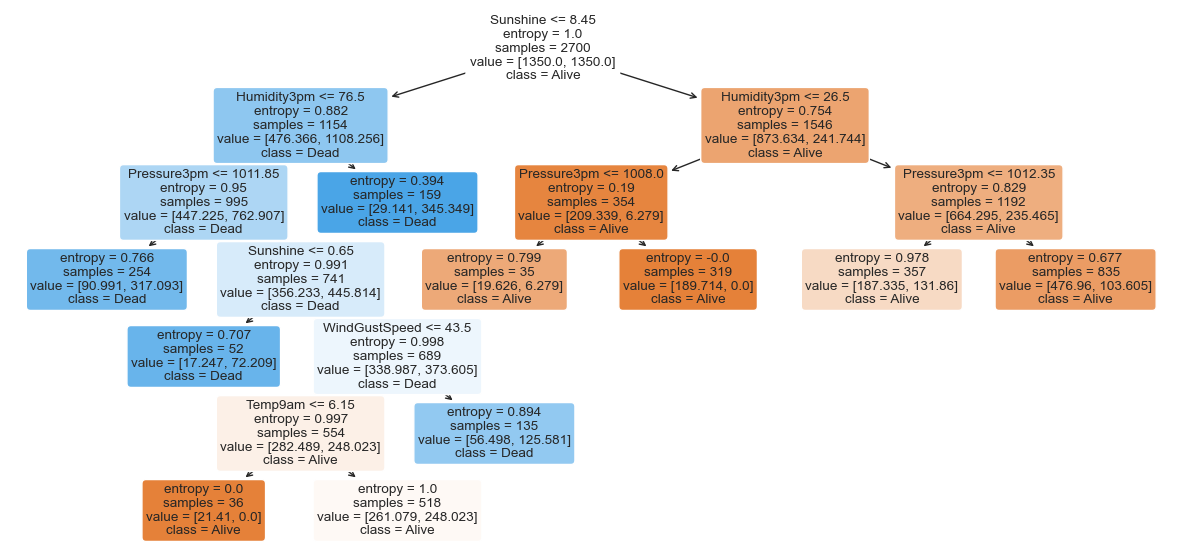

In [480]:
plt.figure(figsize=(15, 7))
plot_tree(classi_tree_unbalanced_pruned,
          filled=True,
          rounded=True,
          class_names=['Alive','Dead'],
          feature_names=X.columns)
plt.show()

# ANN

### SMOTE Oversampling

In [297]:
from tensorflow import keras
from tensorflow.keras import layers,Sequential
import tensorflow as tf

Xnorm = scale(X)
Xnorm = pd.DataFrame(Xnorm, columns=X.columns)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.3, random_state=2)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)

In [298]:
model=tf.keras.Sequential([
    layers.Flatten(input_shape=(X.shape[1], )),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43)                0         
                                                                 
 dense (Dense)               (None, 64)                2816      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [299]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy', 
              metrics=["AUC"])

callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)
history = model.fit(Xtrain_resampled, ytrain_resampled, 
        epochs=150,
        validation_data=(Xtest, ytest),
        batch_size=32, 
        callbacks=[callback],)

Epoch 1/150
144/144 [==============================] - 1s 5ms/step - loss: 0.6936 - auc: 0.5238 - val_loss: 0.6987 - val_auc: 0.5814
Epoch 2/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6897 - auc: 0.5506 - val_loss: 0.6910 - val_auc: 0.6174
Epoch 3/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6874 - auc: 0.5617 - val_loss: 0.6871 - val_auc: 0.6616
Epoch 4/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6859 - auc: 0.5747 - val_loss: 0.6833 - val_auc: 0.6897
Epoch 5/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6856 - auc: 0.5756 - val_loss: 0.6812 - val_auc: 0.7091
Epoch 6/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6808 - auc: 0.5994 - val_loss: 0.6784 - val_auc: 0.7223
Epoch 7/150
144/144 [==============================] - 0s 3ms/step - loss: 0.6791 - auc: 0.6088 - val_loss: 0.6749 - val_auc: 0.7332
Epoch 8/150
144/144 [==============================] - 0s 3ms/step - 

<AxesSubplot:title={'center':'Loss'}>

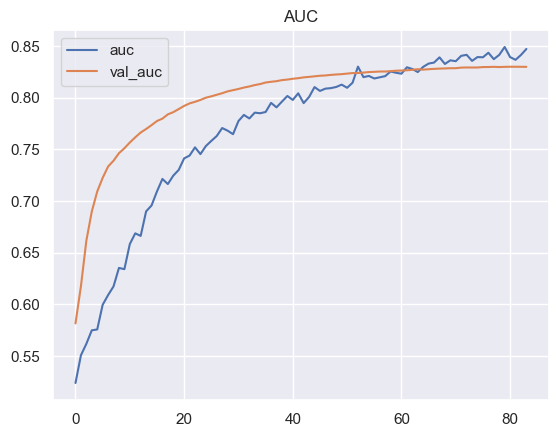

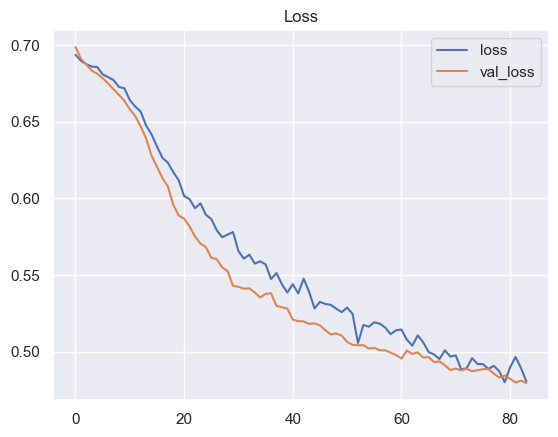

In [300]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['auc', 'val_auc']].plot(title="AUC")
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss")

37/37 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       959
           1       0.38      0.74      0.50       199

    accuracy                           0.75      1158
   macro avg       0.66      0.75      0.67      1158
weighted avg       0.84      0.75      0.77      1158



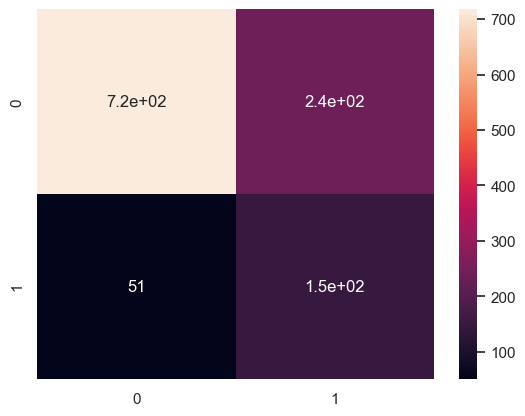

In [301]:
ypred = model.predict(Xtest)
cf = confusion_matrix(ytest, ypred.round())
sns.heatmap(pd.DataFrame(cf) , annot=True)
print(classification_report(ytest,ypred.round()))

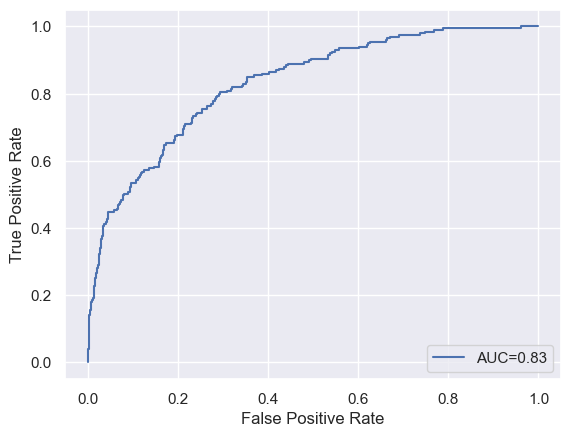

In [302]:
#create ROC curve
fpr, tpr, _ = roc_curve(ytest,  ypred)
auc = roc_auc_score(ytest, ypred)


plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### NearMiss Undersampling

In [309]:
from tensorflow import keras
from tensorflow.keras import layers,Sequential
import tensorflow as tf

Xnorm = scale(X)
Xnorm = pd.DataFrame(Xnorm, columns=X.columns)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.3, random_state=2)
Xtrain_resampled, ytrain_resampled = nm.fit_resample(Xtrain, ytrain)

In [315]:
model=tf.keras.Sequential([
    layers.Flatten(input_shape=(X.shape[1], )),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 43)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                2816      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [316]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy', 
              metrics=["AUC"])

callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)
history = model.fit(Xtrain_resampled, ytrain_resampled, 
        epochs=150,
        validation_data=(Xtest, ytest),
        batch_size=32, 
        callbacks=[callback],)

Epoch 1/150
26/26 [==============================] - 1s 13ms/step - loss: 0.6950 - auc: 0.5038 - val_loss: 0.7018 - val_auc: 0.5140
Epoch 2/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6923 - auc: 0.5314 - val_loss: 0.7039 - val_auc: 0.5151
Epoch 3/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6964 - auc: 0.4993 - val_loss: 0.7063 - val_auc: 0.5115
Epoch 4/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6880 - auc: 0.5754 - val_loss: 0.7079 - val_auc: 0.5261
Epoch 5/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6914 - auc: 0.5350 - val_loss: 0.7089 - val_auc: 0.5303
Epoch 6/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6933 - auc: 0.5239 - val_loss: 0.7102 - val_auc: 0.5323
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6895 - auc: 0.5539 - val_loss: 0.7106 - val_auc: 0.5342
Epoch 8/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6885 - 

Epoch 125/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6295 - auc: 0.7227 - val_loss: 0.6806 - val_auc: 0.7106
Epoch 126/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6065 - auc: 0.7620 - val_loss: 0.6805 - val_auc: 0.7113
Epoch 127/150
26/26 [==============================] - 0s 6ms/step - loss: 0.6248 - auc: 0.7362 - val_loss: 0.6761 - val_auc: 0.7116
Epoch 128/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6188 - auc: 0.7370 - val_loss: 0.6765 - val_auc: 0.7121
Epoch 129/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6189 - auc: 0.7319 - val_loss: 0.6760 - val_auc: 0.7129
Epoch 130/150
26/26 [==============================] - 0s 5ms/step - loss: 0.6185 - auc: 0.7377 - val_loss: 0.6741 - val_auc: 0.7137
Epoch 131/150
26/26 [==============================] - 0s 7ms/step - loss: 0.6193 - auc: 0.7368 - val_loss: 0.6727 - val_auc: 0.7144
Epoch 132/150
26/26 [==============================] - 0s 6ms/step - 

<AxesSubplot:title={'center':'Loss'}>

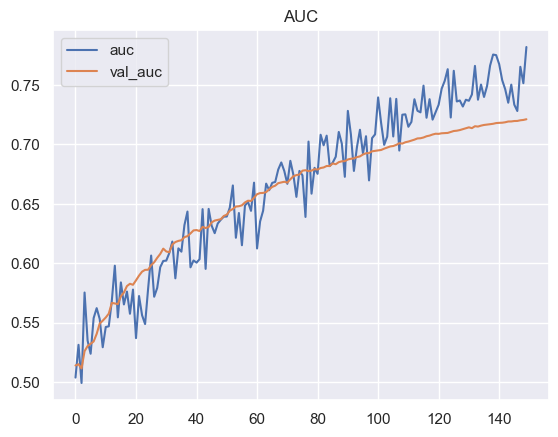

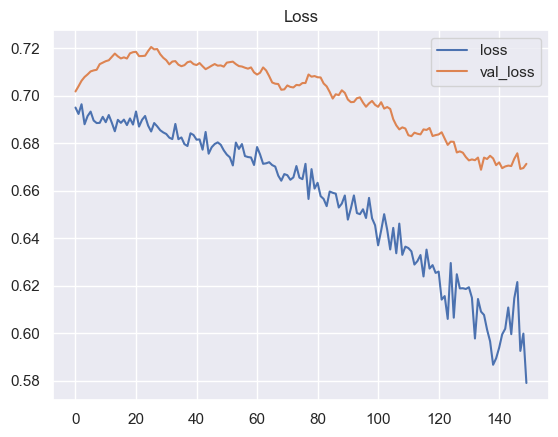

In [317]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['auc', 'val_auc']].plot(title="AUC")
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss")

37/37 [==============================] - 0s 993us/step
              precision    recall  f1-score   support

           0       0.92      0.58      0.71       959
           1       0.27      0.75      0.40       199

    accuracy                           0.61      1158
   macro avg       0.59      0.67      0.56      1158
weighted avg       0.81      0.61      0.66      1158



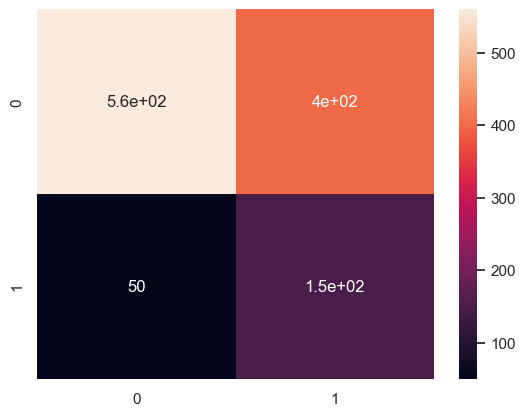

In [318]:
ypred = model.predict(Xtest)
cf = confusion_matrix(ytest, ypred.round())
sns.heatmap(pd.DataFrame(cf) , annot=True)
print(classification_report(ytest,ypred.round()))

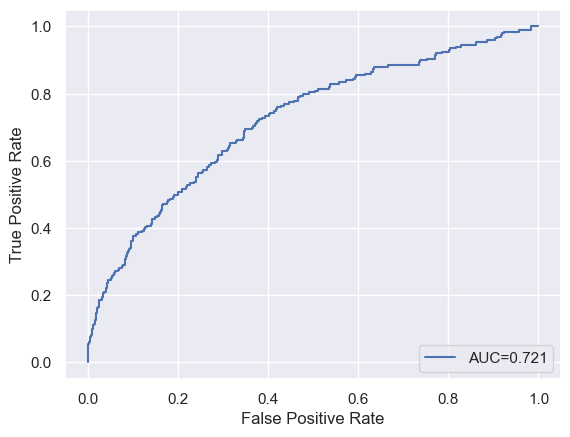

In [319]:
#create ROC curve
fpr, tpr, _ = roc_curve(ytest,  ypred)
auc = roc_auc_score(ytest, ypred)


plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Unbalanced

In [335]:
Xnorm = scale(X)
Xnorm = pd.DataFrame(Xnorm, columns=X.columns)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.3, random_state=2)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)

In [336]:
model=tf.keras.Sequential([
    layers.Flatten(input_shape=(X.shape[1], )),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 43)                0         
                                                                 
 dense_51 (Dense)            (None, 64)                2816      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 128)               8320      
                                                                 
 dense_54 (Dense)            (None, 128)               16512     
                                                                 
 dropout_24 (Dropout)        (None, 128)              

In [337]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy', 
              metrics=["AUC"])

callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=3)
history = model.fit(Xtrain, ytrain, 
        epochs=150,
        validation_data=(Xtest, ytest),
        batch_size=32, 
        callbacks=[callback],)

Epoch 1/150
85/85 [==============================] - 1s 6ms/step - loss: 0.6436 - auc: 0.4763 - val_loss: 0.6418 - val_auc: 0.3468
Epoch 2/150
85/85 [==============================] - 0s 4ms/step - loss: 0.5697 - auc: 0.4386 - val_loss: 0.6024 - val_auc: 0.3430
Epoch 3/150
85/85 [==============================] - 0s 4ms/step - loss: 0.5225 - auc: 0.4244 - val_loss: 0.5711 - val_auc: 0.3517
Epoch 4/150
85/85 [==============================] - 0s 4ms/step - loss: 0.4958 - auc: 0.4218 - val_loss: 0.5496 - val_auc: 0.3579
Epoch 5/150
85/85 [==============================] - 0s 4ms/step - loss: 0.4750 - auc: 0.4294 - val_loss: 0.5339 - val_auc: 0.3657
Epoch 6/150
85/85 [==============================] - 0s 4ms/step - loss: 0.4656 - auc: 0.4399 - val_loss: 0.5233 - val_auc: 0.3741
Epoch 7/150
85/85 [==============================] - 0s 4ms/step - loss: 0.4658 - auc: 0.4266 - val_loss: 0.5173 - val_auc: 0.3837
Epoch 8/150
85/85 [==============================] - 0s 4ms/step - loss: 0.4589 - a

Epoch 125/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3528 - auc: 0.7883 - val_loss: 0.3780 - val_auc: 0.7975
Epoch 126/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3480 - auc: 0.7924 - val_loss: 0.3775 - val_auc: 0.7975
Epoch 127/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3527 - auc: 0.7881 - val_loss: 0.3774 - val_auc: 0.7981
Epoch 128/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3447 - auc: 0.8045 - val_loss: 0.3768 - val_auc: 0.7984
Epoch 129/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3472 - auc: 0.7948 - val_loss: 0.3770 - val_auc: 0.7986
Epoch 130/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3516 - auc: 0.7891 - val_loss: 0.3769 - val_auc: 0.7990
Epoch 131/150
85/85 [==============================] - 0s 4ms/step - loss: 0.3477 - auc: 0.7959 - val_loss: 0.3761 - val_auc: 0.7994
Epoch 132/150
85/85 [==============================] - 0s 4ms/step - 

<AxesSubplot:title={'center':'Loss'}>

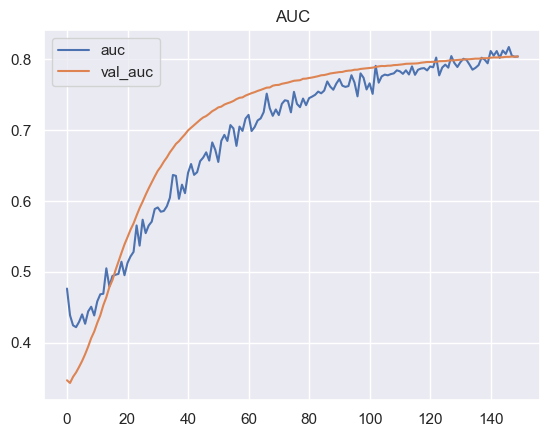

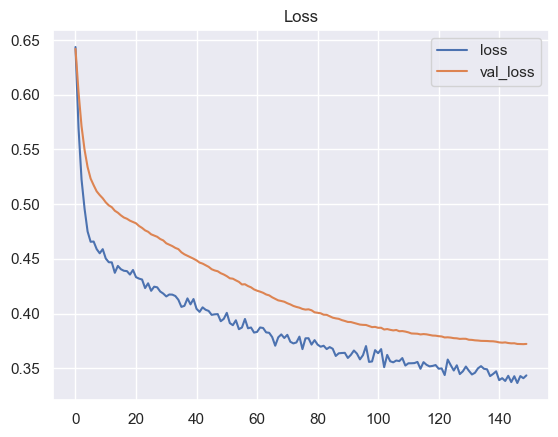

In [338]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['auc', 'val_auc']].plot(title="AUC")
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss")

37/37 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       959
           1       0.62      0.23      0.33       199

    accuracy                           0.84      1158
   macro avg       0.74      0.60      0.62      1158
weighted avg       0.82      0.84      0.81      1158



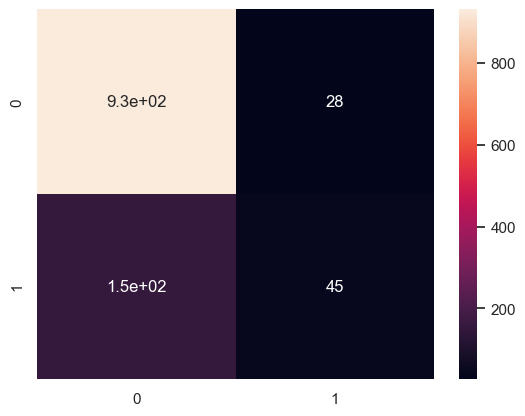

In [339]:
ypred = model.predict(Xtest)
cf = confusion_matrix(ytest, ypred.round())
sns.heatmap(pd.DataFrame(cf) , annot=True)
print(classification_report(ytest,ypred.round()))

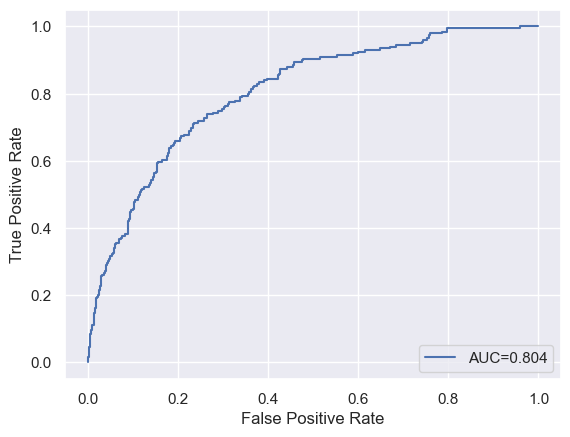

In [340]:
#create ROC curve
fpr, tpr, _ = roc_curve(ytest,  ypred)
auc = roc_auc_score(ytest, ypred)


plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

 # Rule Induction: RIPPER

### SMOTE Oversampling

In [519]:
import wittgenstein as witt
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import NearMiss


In [520]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=13)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(Xtrain, ytrain)

In [521]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(X)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    ripper = witt.RIPPER(prune_size=0.001, k=3, random_state=0)
    ripper.fit(train_X, train_y)
    ypred = ripper.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    

    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = smote.fit_resample(train_X, train_y)
    ripper = witt.RIPPER(prune_size=0.001, k=3,random_state=0)
    ripper.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = ripper.predict(test_X)

    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])

    
    



In [522]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0


,ROC_AUC,F1,Precision,Recall
Balanced,0.635,0.369,0.442,0.380
Unbalanced,0.710,0.432,0.312,0.722


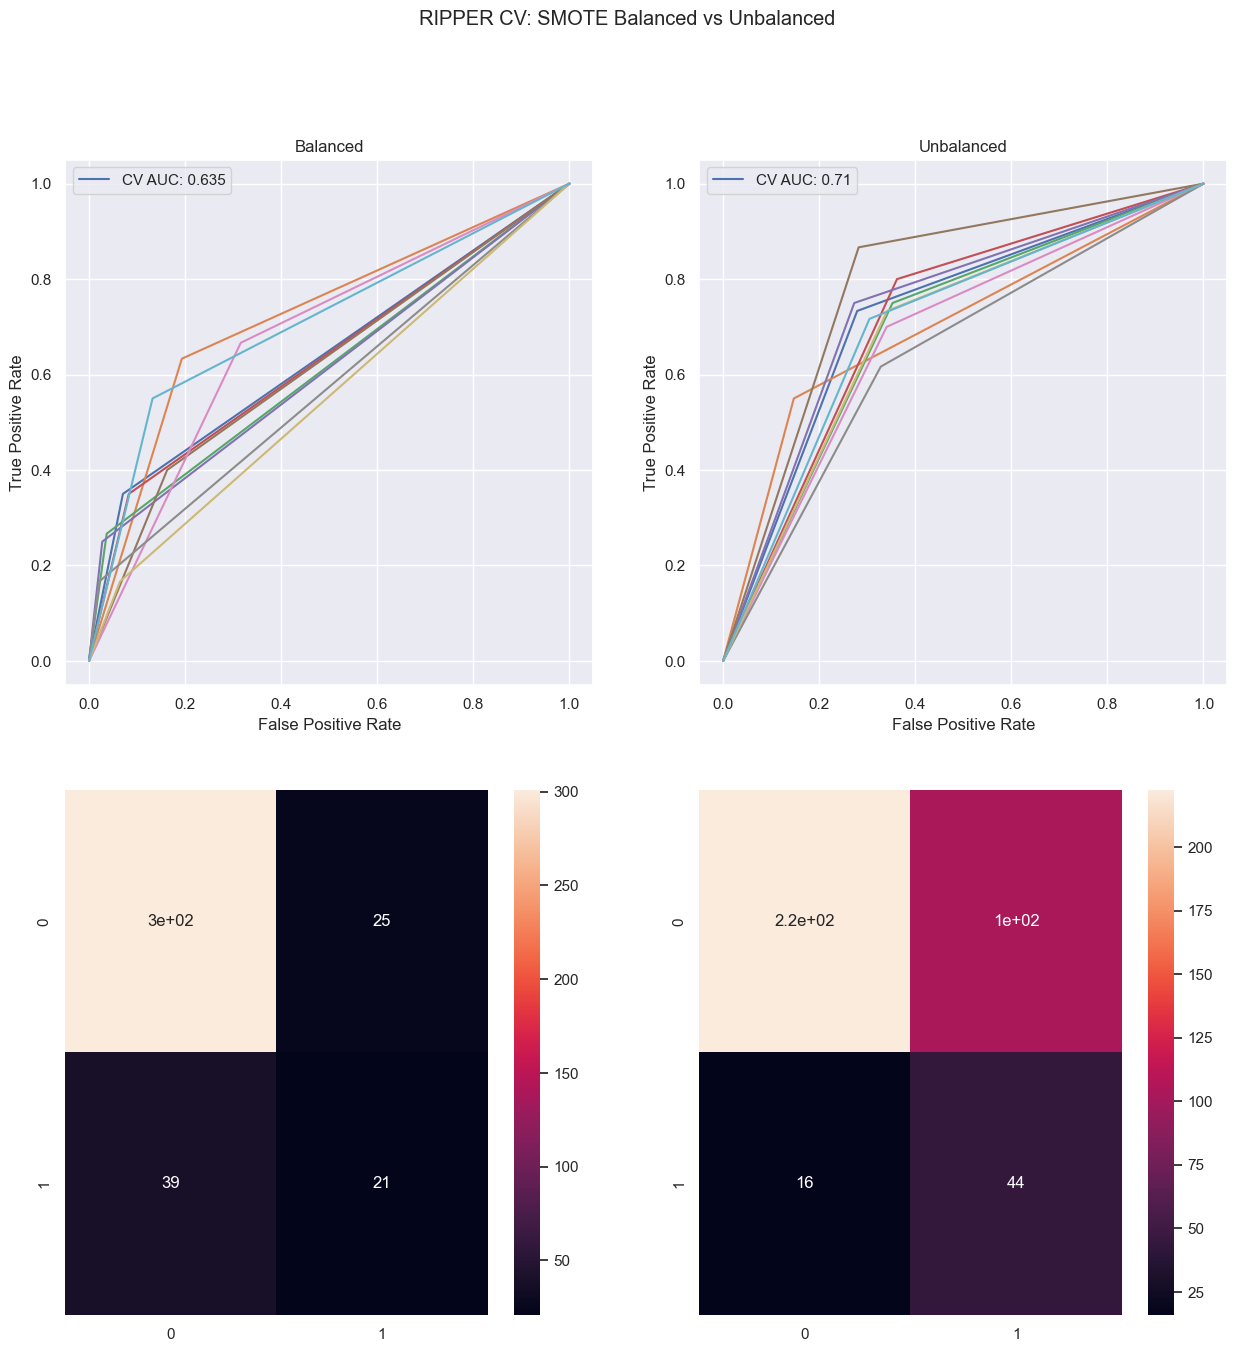

In [523]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'RIPPER CV: SMOTE Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()

    
    

### NearMiss Undersampling

In [524]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=13)
Xtrain_resampled, ytrain_resampled = nm.fit_resample(Xtrain, ytrain)

In [525]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
metrics_resampled = [[],[],[],[]]
metrics = [[],[],[],[]]
results_resampled = []
results = []
Xtrain0 = np.array(X)
ytrain0 = np.array(y)
for train_ix, test_ix in kfold.split(Xtrain0, ytrain0):
    # select rows
    train_X, test_X = Xtrain0[train_ix], Xtrain0[test_ix]
    train_y, test_y = ytrain0[train_ix], ytrain0[test_ix]
    
    # train unbalanced
    ripper = witt.RIPPER(prune_size=0.001, k=3, random_state=0)
    ripper.fit(train_X, train_y)
    ypred = ripper.predict(test_X)
    
    metrics = store_metrics(metrics, test_y, ypred)
    results.append([test_y, ypred])
    

    
    
    # train balanced 
    Xtrain_resampled0, ytrain_resampled0 = nm.fit_resample(train_X, train_y)
    ripper = witt.RIPPER(prune_size=0.001, k=3,random_state=0)
    ripper.fit(Xtrain_resampled0, ytrain_resampled0)
    ypred_resampled = ripper.predict(test_X)

    
    metrics_resampled = store_metrics(metrics_resampled, test_y, ypred_resampled)
    results_resampled.append([test_y, ypred_resampled])

    
    



In [526]:
metrics_resampled = np.array(metrics_resampled)
metrics = np.array(metrics)
results_resampled = np.array(results_resampled)
results = np.array(results)

columns_resampled = ['ROC_AUC_resampled','F1_resampled','Precision_resampled','Recall_resampled']
columns = ['ROC_AUC','F1','Precision','Recall']
metrics_scores = pd.DataFrame(np.concatenate([metrics_resampled.T, metrics.T],axis=1), columns = columns_resampled + columns)
mean_score = np.mean(np.array(metrics_scores), axis=0)
mean_score0 = pd.DataFrame(mean_score.round(3).reshape(2,4), columns = columns, index=['Balanced','Unbalanced'])
mean_score0


,ROC_AUC,F1,Precision,Recall
Balanced,0.638,0.361,0.267,0.568
Unbalanced,0.710,0.432,0.312,0.722


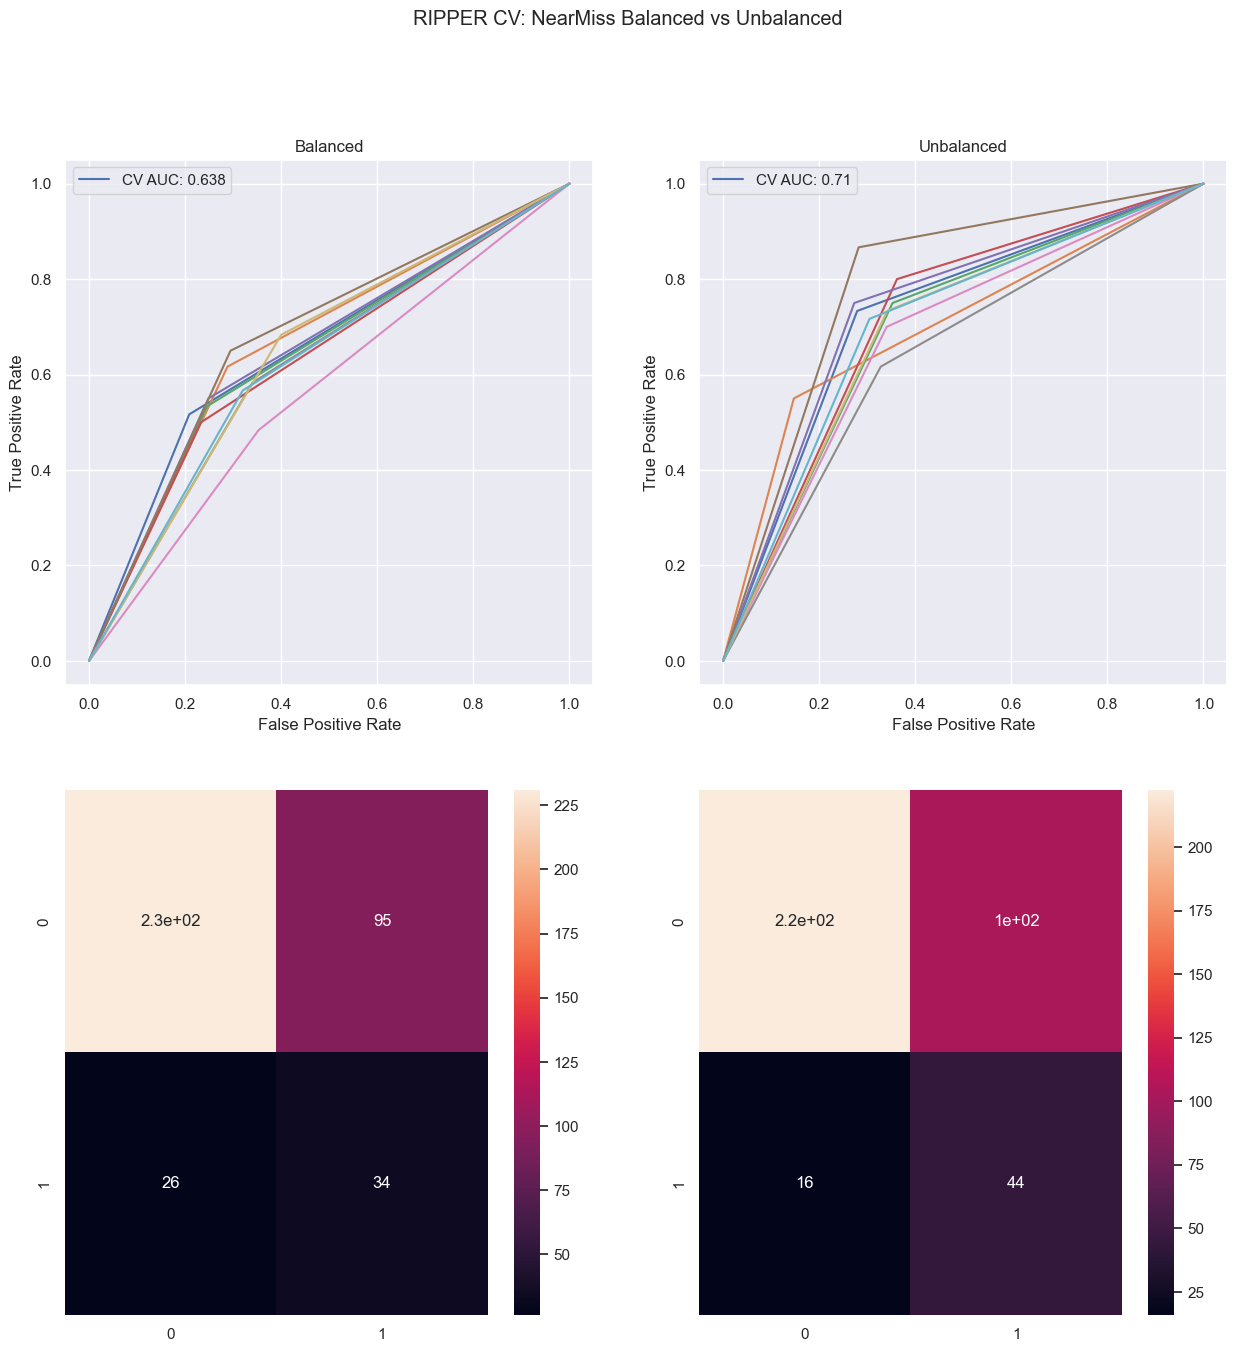

In [527]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(f'RIPPER CV: NearMiss Balanced vs Unbalanced')
sns.set(font_scale = 1)

cflist = []
cflist_resampled = []
for res_resampled, res in zip(results_resampled, results):

    fpr, tpr, _ = roc_curve(res_resampled[0],  res_resampled[1])
    auc = roc_auc_score(res_resampled[0],  res_resampled[1])
    cf = confusion_matrix(res_resampled[0],  res_resampled[1])
    cflist_resampled.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,0])
    axes[0,0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,0].set_title('Balanced')

    
    
    fpr, tpr, _ = roc_curve(res[0],  res[1])
    auc = roc_auc_score(res[0],  res[1])
    cf = confusion_matrix(res[0],  res[1])
    cflist.append(cf)
    sns.lineplot(x=fpr,y=tpr,ax = axes[0,1])
    axes[0,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[0,1].set_title('Unbalanced')
    
    
axes[0,0].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][0],3)}"])
axes[0,1].legend([f"CV AUC: {round(mean_score0['ROC_AUC'][1],3)}"])

cf = np.median(cflist,axis=0)
cf_resampled = np.median(cflist_resampled,axis=0)
sns.heatmap(pd.DataFrame(cf_resampled) , annot=True, ax = axes[1,0])
sns.heatmap(pd.DataFrame(cf) , annot=True, ax = axes[1,1])   
plt.show()

    
    